# Telecom Customer Churn Project

### Project Flow

1. Checking the Null Values in the column and removing columns having more tha 60% of null values.

2. Replace null values with mean or median for numerical data and filling with mode for categorical data.

3. Type casting :

    - Checking for inappropriate data types and convert them 
    - 
    
4. Divide the data into numerical and categorical.

5. Identify , Remove un-necessary columns in the DataFrame.

6. Check for outliers in numerical data and remove or replace them with median.

    - Identifying co relation in  numerical columns and remove columns that are highy co related
    
7. Check categorical columns for value counts and if we have any feature engineering to do.

    - Creating columns for existing columns
    - Domain Knowledge is required
    
8. Identifying either category column belongs to Ordinal or Nominal and convert them accordingly.

9. Perform Standardization on numerical columns if necessary.

10. Assign a target column.

11. Divide the data into train test split.

12. Model Building.

    - KNN
    - Navie Bayes
    - SVM
    - Decision Tree
    - Random Forest Classifier
    
13. Evaluation Metrics.

    - Confusion Matrix
    - Accuracy Score
    - Classification Report
    
14. Basic Analysis [Co-relation analysis].

    - Heat Map

# Plots on EDA

1. Uni Variate :
    
    Numerical :
    
       - Dist Plot (Seaborn)
       - Histogram
       - Box Plot (To check Outliers)
       - Violin Plot
        
    Categorical : 
    
        Value counts :
           - Bar plot (Mat Plot Lib)
           - Count Plot (Sea Born)
           - Pie Chart
            
2. Bi Variate :
    
    Numerical and Numerical :
    
       - Scatter Plot
       - Dist Plot
       - Histogram
       - Box Plot
        
    Numerical and Categorical : 
    
       - Box Plot
       - Histogram
       - Violin Plot
       - Pie Chart
        
    Categorical and categorical : 
    
       - Cross Tab
        
3. Multi variate : [Add 'Hue' to the existing columns]
    
    Numerical :
    
       - Scatter Plot
       - Dist Plot
       - Histogram
       - Box Plot
        
    Numerical and Categorical : 
    
       - Box Plot
       - Histogram
       - Violin Plot
       - Pie Chart
        
    Categorical :
    
       - Cross Tab

### Required Libraries

In [1]:
# Python Libraries

import numpy as np
import pandas as pd

# EDA - Visualizaion Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries

# Encoding
# Label Encoder 
from sklearn.preprocessing import LabelEncoder

# Normalization
# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Classification Report , Confusion Matrix , Accuracy Score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# K NN
from sklearn.neighbors import KNeighborsClassifier 

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# SVM - Support Vector Machines
from sklearn.svm import SVC 

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

# Ignore File Warnings
import warnings 
warnings.filterwarnings('ignore')

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

### Reading the file 

In [3]:
customer_churn = pd.read_csv("C:/Users/rjsek/OneDrive/Documents/Work and Professional documents/Innomatics Research Labs/Python/Classes/Running Notes/Machine Learning/Churn.csv")
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Creating a copy of the original data set

In [4]:
churn = customer_churn.copy()
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Basic Analysis

In [5]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [267]:
# churn.head()
# churn.tail()
churn.info()
# churn.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

### Converting Float values to Integers

In [7]:
# Converting Total charges column - To string (str)

In [8]:
churn['TotalCharges'] = churn['TotalCharges'].astype(str)
churn = churn[churn['TotalCharges'] != '']
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn = churn.dropna(subset=['TotalCharges'])

In [9]:
# Converting Total charges column - To integer (int)

In [10]:
churn['TotalCharges'] = churn['TotalCharges'].astype(int)
churn = churn[churn['TotalCharges'] != '']
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn = churn.dropna(subset=['TotalCharges'])

In [11]:
# Raising an error

# - First convert it to d_type = str and later convert to int

In [12]:
# Converting Monthly charges column

In [13]:
churn['MonthlyCharges'] = churn['MonthlyCharges'].astype(int)
churn = churn[churn['MonthlyCharges'] != '']
churn['MonthlyCharges'] = pd.to_numeric(churn['MonthlyCharges'], errors='coerce')
churn = churn.dropna(subset=['MonthlyCharges'])

In [14]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56,1889,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84,1990,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7362,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,346,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74,306,Yes


### Getting Numerical and Categorical columns 

In [15]:
# Categorical columns

In [16]:
churn_cat_df = churn.select_dtypes(exclude = 'number')
churn_cat_df

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
churn_cat_df.isnull().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [18]:
# Numerical columns

In [19]:
churn_num_df = churn.select_dtypes(include = 'number')
churn_num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29,29
1,0,34,56,1889
2,0,2,53,108
3,0,45,42,1840
4,0,2,70,151
...,...,...,...,...
7038,0,24,84,1990
7039,0,72,103,7362
7040,0,11,29,346
7041,1,4,74,306


In [20]:
churn_num_df.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

### Checking for Outliers

In [21]:
#Q1 = churn.quantile(0.25)
#Q3 = churn.quantile(0.75)
#IQR = Q3 - Q1
#outliers = (churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))

In [22]:
#outliers.any()

### Dealing with Outliers

In [23]:
#columns_to_process = ['SeniorCitizen']

In [24]:
#for col in columns_to_process:
    #median_value = churn[col].median()
    #Q1 = churn[col].quantile(0.25)
    #Q3 = churn[col].quantile(0.75)
    #IQR = Q3 - Q1
    #outliers = churn[(churn[col] < (Q1 - 1.5 * IQR)) | (churn[col] > (Q3 + 1.5 * IQR))]
    #churn.loc[outliers.index, col] = median_value

In [25]:
#churn.isnull().sum()

In [26]:
#outliers.any()

### Setting the Target column

In [27]:
# Assigning a variable 'y' to the target column

In [28]:
y = churn_cat_df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [29]:
# Target column

In [30]:
y.shape 

(7032,)

### Dropping unnecessary columns 

In [31]:
# Removing 'customerID' because it is not required

In [32]:
# Removing 'Churn' because it is the target column

In [33]:
churn_cat_df.drop(["customerID","Churn"],axis=1,inplace=True)  
churn_cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


### Getting unique values before Encoding

In [34]:
print("Internet Service :")
print(churn_cat_df['InternetService'].unique())
print("Multiple Lines :")
print(churn_cat_df['MultipleLines'].unique())
print("Contract :")
print(churn_cat_df['Contract'].unique())
print("Payment Method :")
print(churn_cat_df['PaymentMethod'].unique())
print("Streaming Movies :")
print(churn_cat_df['StreamingMovies'].unique())
print("Streaming TV :")
print(churn_cat_df['StreamingTV'].unique())

Internet Service :
['DSL' 'Fiber optic' 'No']
Multiple Lines :
['No phone service' 'No' 'Yes']
Contract :
['Month-to-month' 'One year' 'Two year']
Payment Method :
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Streaming Movies :
['No' 'Yes' 'No internet service']
Streaming TV :
['No' 'Yes' 'No internet service']


### Encoding

In [35]:
# Encoding the Categorical Columns

In [36]:
# Nominal Encoding

In [37]:
# One Hot Encoder

In [38]:
OneEncoder = ['InternetService','MultipleLines','Contract','PaymentMethod','StreamingMovies','StreamingTV']
churn_cat_df = pd.get_dummies(churn_cat_df,columns = OneEncoder)

In [39]:
# Converting the remaining Categorical columns

In [40]:
# Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of columns to be encoded
columns_to_encode = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling']

# Apply label encoding to the specified columns
churn_cat_df[columns_to_encode] = churn_cat_df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

In [42]:
churn_cat_df

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,0,1,0,0,0,2,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,1,2,0,2,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,1,2,2,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,2,0,2,2,0,1,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,2,1,1,...,0,0,0,1,0,0,1,0,0,1
7039,0,1,1,1,0,2,2,0,1,0,...,0,1,0,0,0,0,1,0,0,1
7040,0,1,1,0,2,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7041,1,1,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


### Normalization

In [43]:
# Standard Scalar

In [1]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
churn_num_df = pd.DataFrame(ss.fit_transform(churn_num_df),columns=churn_num_df.columns)

NameError: name 'pd' is not defined

In [ ]:
churn_num_df

In [46]:
# Resetting the indexes before concatenating Numerical and Categorical columns

In [47]:
churn_cat_df.reset_index(drop=True,inplace=True)
churn_num_df.reset_index(drop=True,inplace=True)

In [48]:
# Concatenating Numerical and Categorical columns

In [49]:
Churn = pd.concat([churn_num_df,churn_cat_df], axis=1)
Churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,-0.440327,-1.280248,-1.174362,-0.994363,0,1,0,0,0,2,...,0,0,1,0,1,0,0,1,0,0
1,-0.440327,0.064303,-0.276951,-0.173753,1,0,0,1,2,0,...,0,0,0,1,1,0,0,1,0,0
2,-0.440327,-1.239504,-0.376663,-0.959509,1,0,0,1,2,2,...,0,0,0,1,1,0,0,1,0,0
3,-0.440327,0.512486,-0.742275,-0.195372,1,0,0,0,2,0,...,1,0,0,0,1,0,0,1,0,0
4,-0.440327,-1.239504,0.188374,-0.940538,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.653699,-0.129193,1,1,1,1,2,0,...,0,0,0,1,0,0,1,0,0,1
7028,-0.440327,1.612573,1.285210,2.240869,0,1,1,1,0,2,...,0,1,0,0,0,0,1,0,0,1
7029,-0.440327,-0.872808,-1.174362,-0.854506,0,1,1,0,2,0,...,0,0,1,0,1,0,0,1,0,0
7030,2.271039,-1.158016,0.321324,-0.872154,1,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [50]:
# Assigning the output data to a variable 'X' for train and test split

In [51]:
x = Churn
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,-0.440327,-1.280248,-1.174362,-0.994363,0,1,0,0,0,2,...,0,0,1,0,1,0,0,1,0,0
1,-0.440327,0.064303,-0.276951,-0.173753,1,0,0,1,2,0,...,0,0,0,1,1,0,0,1,0,0
2,-0.440327,-1.239504,-0.376663,-0.959509,1,0,0,1,2,2,...,0,0,0,1,1,0,0,1,0,0
3,-0.440327,0.512486,-0.742275,-0.195372,1,0,0,0,2,0,...,1,0,0,0,1,0,0,1,0,0
4,-0.440327,-1.239504,0.188374,-0.940538,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.653699,-0.129193,1,1,1,1,2,0,...,0,0,0,1,0,0,1,0,0,1
7028,-0.440327,1.612573,1.285210,2.240869,0,1,1,1,0,2,...,0,1,0,0,0,0,1,0,0,1
7029,-0.440327,-0.872808,-1.174362,-0.854506,0,1,1,0,2,0,...,0,0,1,0,1,0,0,1,0,0
7030,2.271039,-1.158016,0.321324,-0.872154,1,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [52]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [53]:
# Splitting the data

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
x_train, x_test, y_train, y_test

(      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender  Partner  \
 1944      -0.440327  1.408853        1.318448      2.030422       1        1   
 6509      -0.440327 -1.280248       -0.642563     -0.987304       1        0   
 2402      -0.440327 -1.239504        0.188374     -0.944950       0        1   
 6489      -0.440327 -1.280248        0.587224     -0.970980       0        0   
 1662      -0.440327 -0.750577       -1.340549     -0.865536       1        0   
 ...             ...       ...             ...           ...     ...      ...   
 2260      -0.440327 -0.832064        1.584348     -0.396553       1        0   
 3915       2.271039  1.408853        0.986073      1.674825       1        1   
 5261      -0.440327  0.308766       -0.310188     -0.063456       1        0   
 2024      -0.440327  1.408853        0.853123      1.664677       1        1   
 1710      -0.440327  0.553230       -1.506737     -0.580529       0        1   
 
       Dependents  PhoneSe

In [56]:
# Checking the shape of split data

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 32), (1407, 32), (5625,), (1407,))

### Model building

## KNN

In [58]:
# Library
from sklearn.neighbors import KNeighborsClassifier 

# Initializing
classifier = KNeighborsClassifier(n_neighbors =5) 

# Training 
classifier.fit(x_train,y_train) 

KNeighborsClassifier()

In [59]:
# Predictions

In [60]:
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [61]:
# Getting the Classification Report
#             Confusion Matrix
#             Accuracy Score

In [62]:
# Library
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407



In [64]:
# Confusion Matrix
print("Confusion Matrix : " ,confusion_matrix(y_test,y_pred) )

Confusion Matrix :  [[861 163]
 [190 193]]


In [65]:
# Accuracy Score
print("Accuracy Score : ", accuracy_score(y_test,y_pred)*100)

Accuracy Score :  74.91115849324804


In [66]:
# Screenshot

In [67]:
# Classification Report
print(classification_report(y_test,y_pred))

# Confusion Matrix
print("Confusion Matrix : " ,confusion_matrix(y_test,
                                              y_pred) )

# Accuracy Score
print("Accuracy Score : ", accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407

Confusion Matrix :  [[861 163]
 [190 193]]
Accuracy Score :  74.91115849324804


In [68]:
# Error 
error = []
for i in range(2,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)

  error.append(np.mean(pred_i!=y_test))

In [69]:
print(error)

[0.2601279317697228, 0.2601279317697228, 0.24520255863539445, 0.2508884150675195, 0.23169864960909736, 0.24235963041933192, 0.2281449893390192, 0.23383084577114427, 0.21961620469083157, 0.2267235252309879, 0.2224591329068941, 0.2267235252309879, 0.2224591329068941, 0.22032693674484718, 0.21961620469083157, 0.22174840085287847, 0.2125088841506752, 0.21606254442075337, 0.21535181236673773, 0.21393034825870647, 0.2125088841506752, 0.21606254442075337, 0.2103766879886283, 0.2125088841506752, 0.2068230277185501, 0.20540156361051884, 0.20540156361051884, 0.21108742004264391, 0.21179815209665956, 0.2082444918265814, 0.2082444918265814, 0.2103766879886283, 0.2125088841506752, 0.2082444918265814, 0.21179815209665956, 0.21677327647476902, 0.21535181236673773, 0.21606254442075337, 0.21393034825870647, 0.21748400852878466, 0.21819474058280028, 0.21606254442075337, 0.21108742004264391, 0.2103766879886283, 0.2125088841506752, 0.21321961620469082, 0.2103766879886283, 0.2103766879886283, 0.20966595593

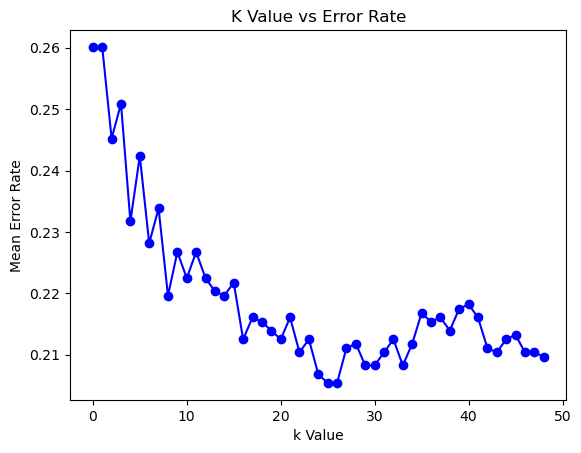

In [70]:
# Visualizing the Error Report
import matplotlib.pyplot as plt 
plt.plot(error,color='blue',marker='o')
plt.xlabel('k Value')
plt.ylabel('Mean Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

## Naive Bayes

In [71]:
# Library
from sklearn.naive_bayes import GaussianNB

In [72]:
clf = GaussianNB(var_smoothing = 0.0001) # Hyper parameter 
clf.fit(x_train,y_train)

GaussianNB(var_smoothing=0.0001)

In [73]:
# Predictions
test_prediction = clf.predict(x_test)
test_prediction

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [74]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407



In [75]:
# Validation Accuracy 
print("validation Accuracy:", accuracy_score(y_test, test_prediction) * 100)

validation Accuracy: 70.78891257995735


In [76]:
# Accuracy Score
print("Accuracy Score : " ,accuracy_score(y_test,test_prediction)*100)

Accuracy Score :  70.78891257995735


In [77]:
# Screenshot

In [78]:
clf = GaussianNB(var_smoothing = 0.0001) # Hyper parameter 
clf.fit(x_train,y_train)

print(classification_report(y_test,y_pred))

print("validation Accuracy:", accuracy_score(y_test, test_prediction) * 100)

print("Accuracy Score : " ,accuracy_score(y_test,test_prediction)*100)

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407

validation Accuracy: 70.78891257995735
Accuracy Score :  70.78891257995735


## SVM

In [79]:
# Libraries

# Support vector classifier
from sklearn.svm import SVC 

In [80]:
rbf_svm = SVC(kernel='rbf', C=100, gamma=0.03, random_state=0)

# Train the classifier
rbf_svm.fit(x_train, y_train)

test_predictions=rbf_svm.predict(x_test)
train_predictions=rbf_svm.predict(x_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy : ", accuracy_score(y_train, train_predictions) * 100)
print("Test Accuracy : ", accuracy_score(y_test, test_predictions) * 100)

[[893 131]
 [175 208]]
              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1024
         Yes       0.61      0.54      0.58       383

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407

Train Accuracy :  86.1511111111111
Test Accuracy :  78.25159914712152


In [81]:
# Screenshot

## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

decisionTree_model = DecisionTreeClassifier(class_weight = "balanced" , criterion = 'entropy')

decisionTree_model.fit(x_train , y_train)

train_predictions = decisionTree_model.predict(x_train)

test_predictions = decisionTree_model.predict(x_test)

print(classification_report(y_test, y_pred))
print("Decision Tree Train Accuracy : ",accuracy_score(y_train,train_predictions) * 100)
print("Decision Tree Test Accuracy : ",accuracy_score(y_test,test_predictions) * 100)

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407

Decision Tree Train Accuracy :  98.82666666666667
Decision Tree Test Accuracy :  72.92110874200426


## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

RF_clf = RandomForestClassifier (random_state = 0 , n_jobs = -1 , class_weight = "balanced" , oob_score = True)
RF_clf.fit(x_train , y_train)

print(classification_report(y_test, y_pred))

rf_train_predictions = RF_clf.predict(x_train)
print("Random Forest Train Accuracy :" , accuracy_score(y_train , rf_train_predictions) * 100)
rf_predictions = RF_clf.predict(x_test)
print("Random Forest Test Accuracy :" , accuracy_score(y_test , rf_predictions) * 100)

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1024
         Yes       0.54      0.50      0.52       383

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.75      0.75      1407

Random Forest Train Accuracy : 98.91555555555556
Random Forest Test Accuracy : 78.03837953091684


# EDA - Exploratory Data Analysis

In [84]:
# Replacing "1" and "0" with "Yes" and "No" for better visual understanding by using 'Map' function

In [85]:
# Map Function

In [86]:
y = y.map({"Yes":1,"No":0})

In [87]:
# Data Visualization

In [88]:
# Libraries

import seaborn as sns
import matplotlib.pyplot as plt

### Heat Map

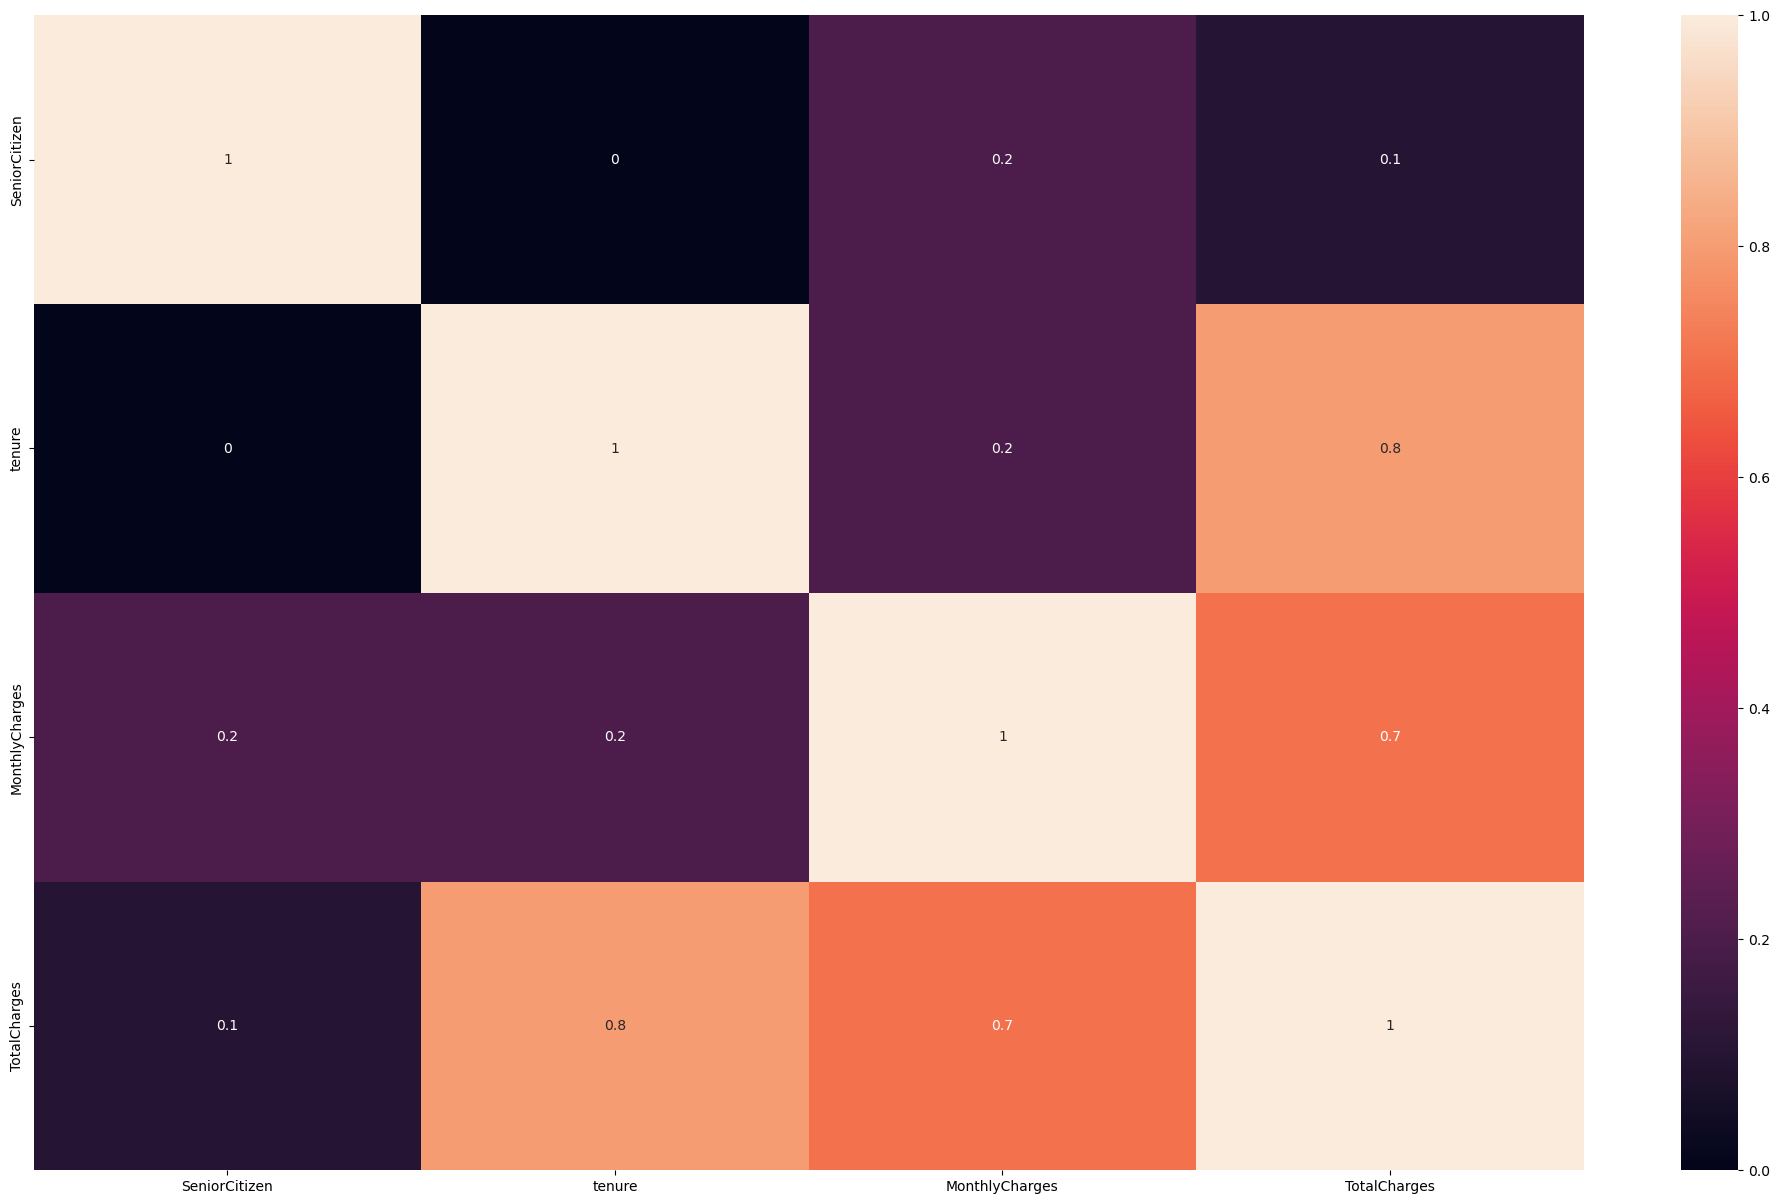

In [89]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)

# plt.figure(figsize = (8,5))

# Correlation plot using "heatmap"
sns.heatmap(round(churn.corr(),1), annot = True) 

plt.show() 

In [90]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56,1889,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84,1990,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7362,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,346,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74,306,Yes


## Uni - Variate Analysis

#### For Categorical Data

In [91]:
# Bar Chart 

In [92]:
# Gender

<Axes: >

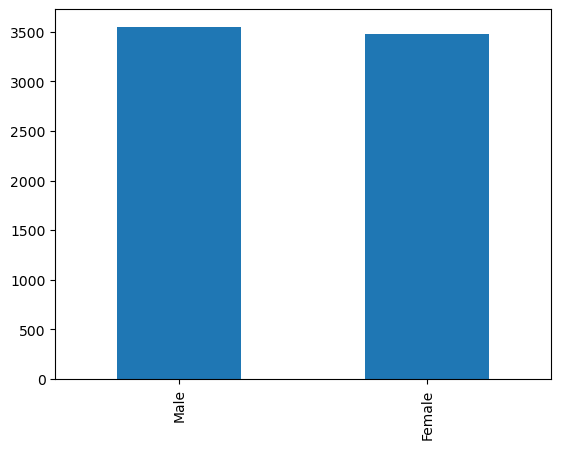

In [93]:
churn['gender'].value_counts().plot.bar()

In [94]:
# Count Plot

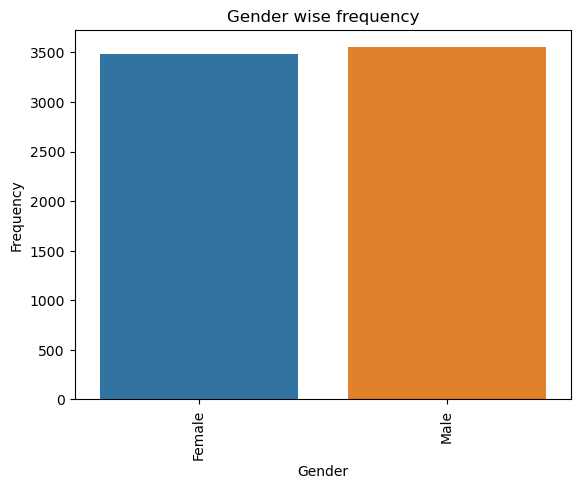

In [95]:
sns.countplot(x='gender' , data = churn)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender wise frequency")
plt.xticks(rotation = 90)
plt.show()

In [96]:
# Internet Service

<Axes: >

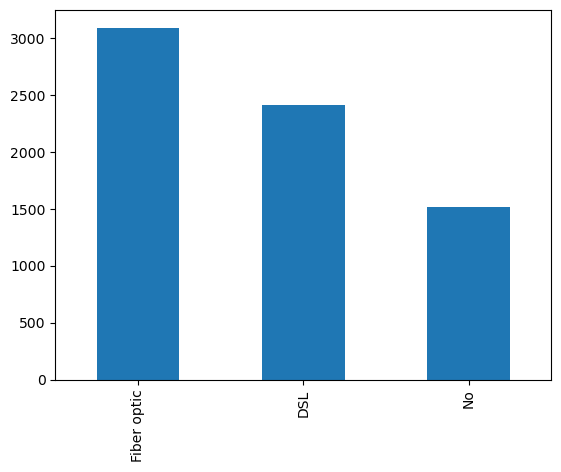

In [97]:
churn['InternetService'].value_counts().plot.bar()

In [98]:
# Count Plot

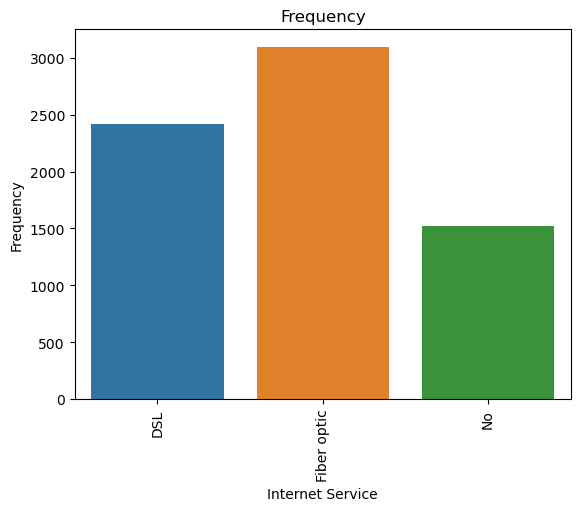

In [99]:
sns.countplot(x='InternetService' , data = churn)
plt.xlabel("Internet Service")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [100]:
# Partner

<Axes: >

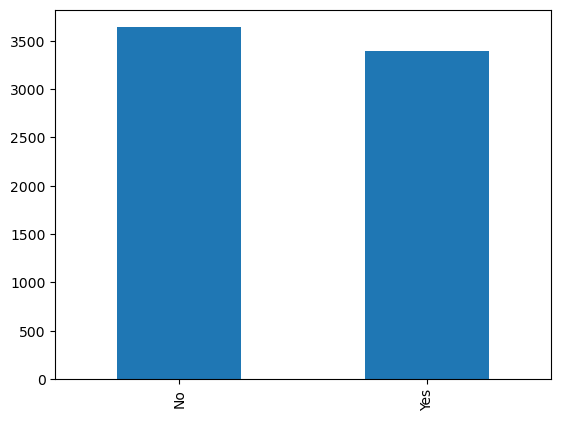

In [101]:
churn['Partner'].value_counts().plot.bar()

In [102]:
# Count Plot

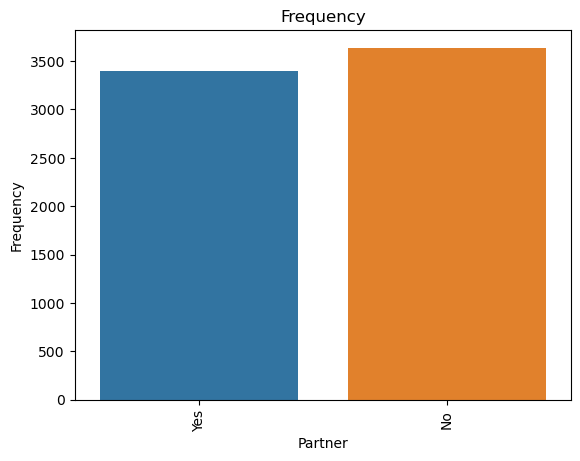

In [103]:
sns.countplot(x='Partner' , data = churn)
plt.xlabel("Partner")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [104]:
# Dependents

<Axes: >

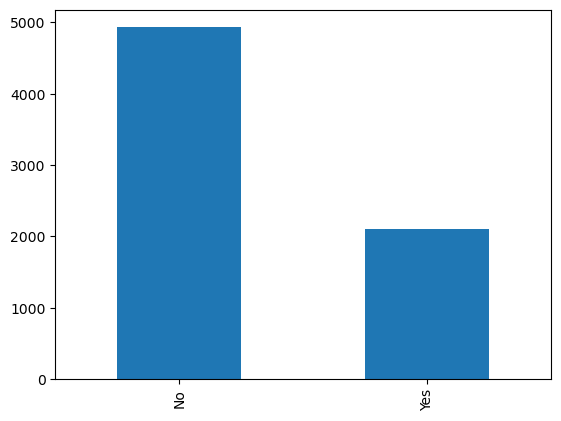

In [105]:
churn['Dependents'].value_counts().plot.bar()

In [106]:
# Count Plot

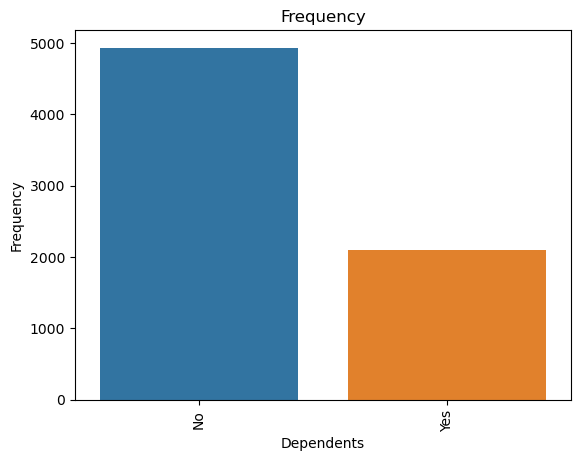

In [107]:
sns.countplot(x='Dependents' , data = churn)
plt.xlabel("Dependents")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [108]:
# Phone Service

<Axes: >

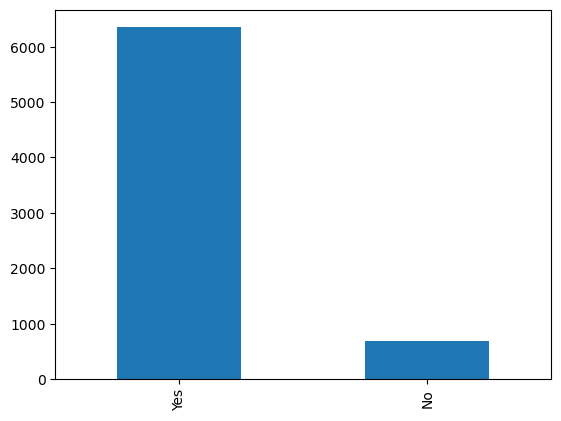

In [109]:
churn['PhoneService'].value_counts().plot.bar()

In [110]:
# Count Plot

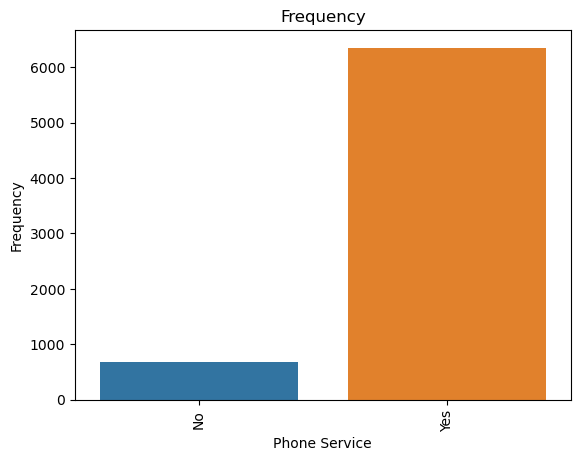

In [111]:
sns.countplot(x='PhoneService' , data = churn)
plt.xlabel("Phone Service")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [112]:
# Multiple Lines

<Axes: >

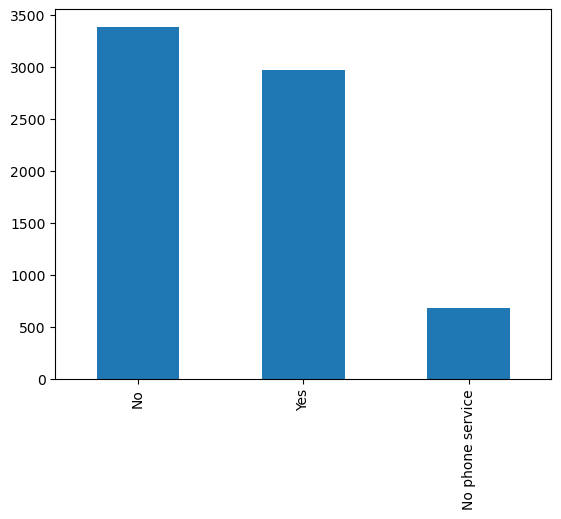

In [113]:
churn['MultipleLines'].value_counts().plot.bar()

In [114]:
# Count Plot

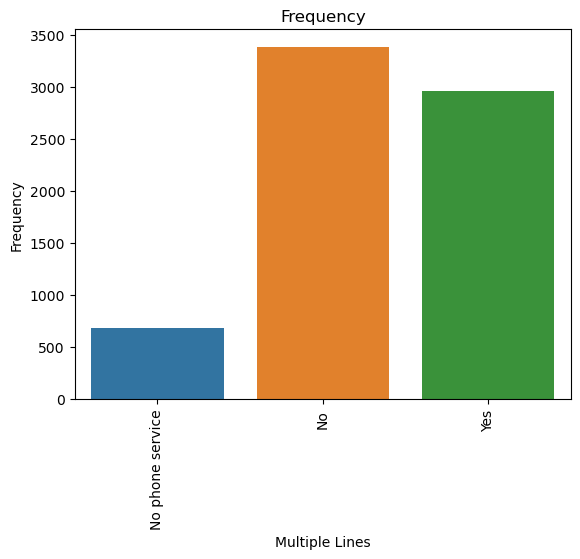

In [115]:
sns.countplot(x='MultipleLines' , data = churn)
plt.xlabel("Multiple Lines")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [116]:
# Online Security

<Axes: >

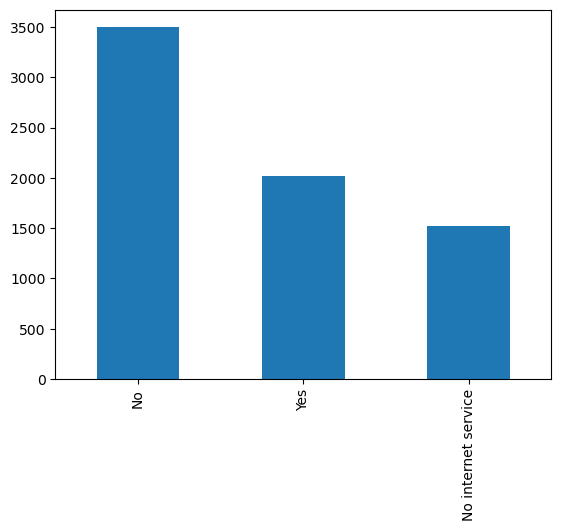

In [117]:
churn['OnlineSecurity'].value_counts().plot.bar()

In [118]:
# Count Plot

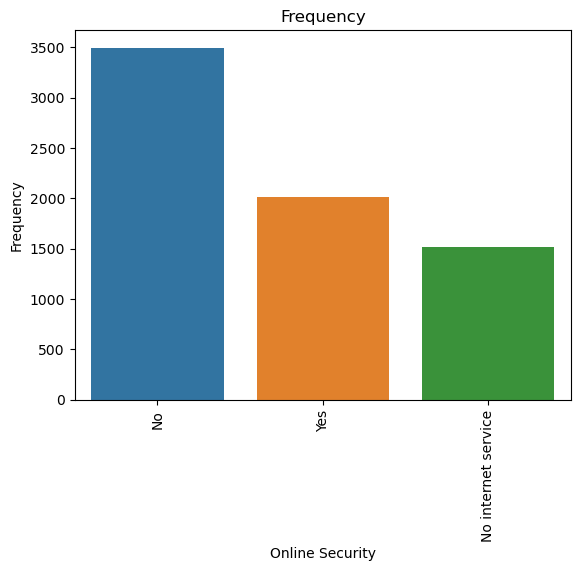

In [119]:
sns.countplot(x='OnlineSecurity' , data = churn)
plt.xlabel("Online Security")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [120]:
# Online Backup

<Axes: >

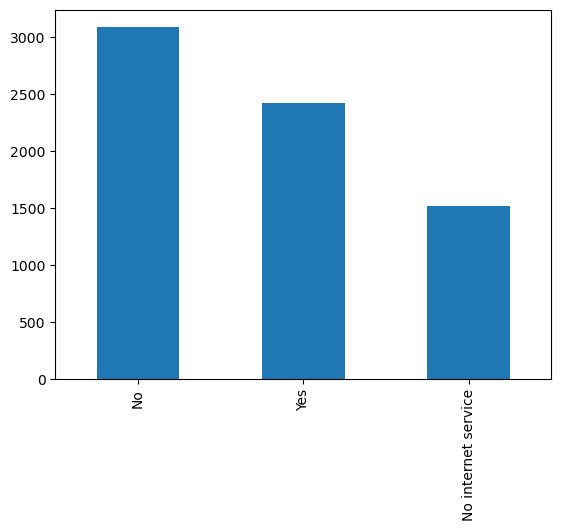

In [121]:
churn['OnlineBackup'].value_counts().plot.bar()

In [122]:
# Count Plot

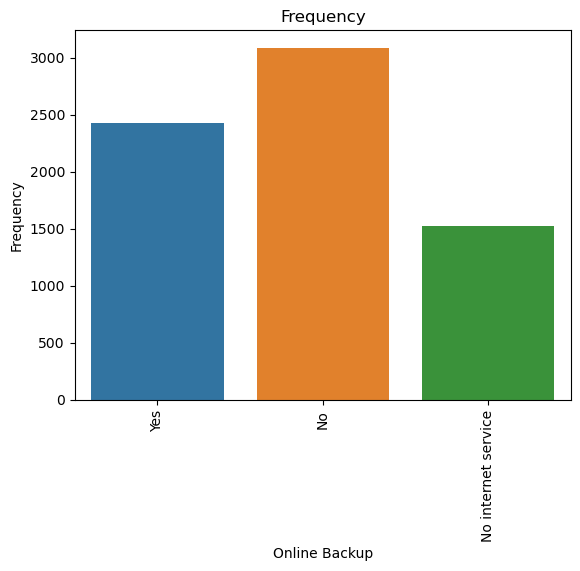

In [123]:
sns.countplot(x='OnlineBackup' , data = churn)
plt.xlabel("Online Backup")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [124]:
# Device Protection

<Axes: >

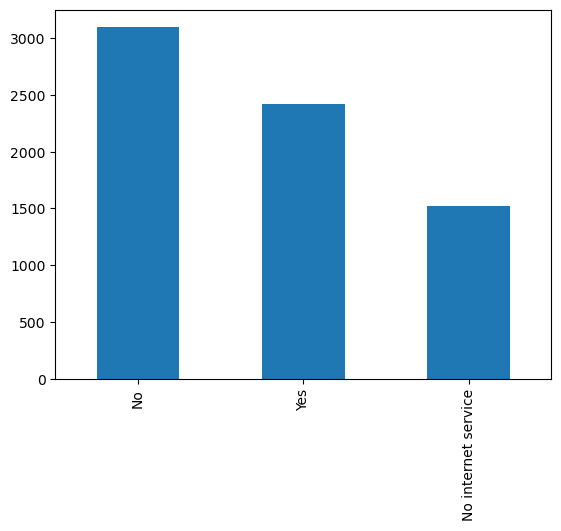

In [125]:
churn['DeviceProtection'].value_counts().plot.bar()

In [126]:
# Count Plot

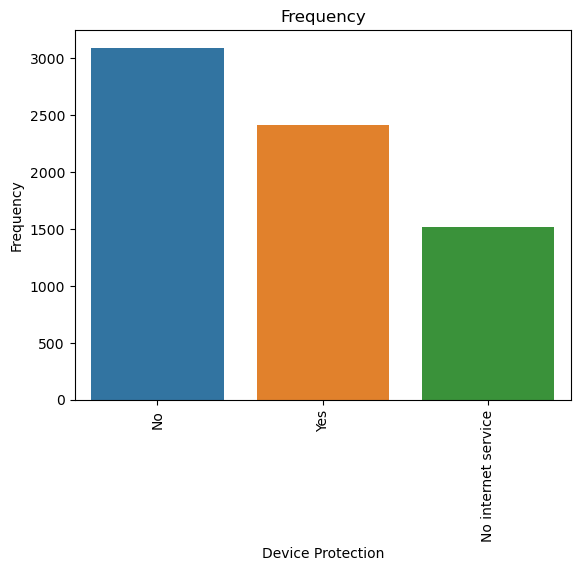

In [127]:
sns.countplot(x='DeviceProtection' , data = churn)
plt.xlabel("Device Protection")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [128]:
# Tech Support

<Axes: >

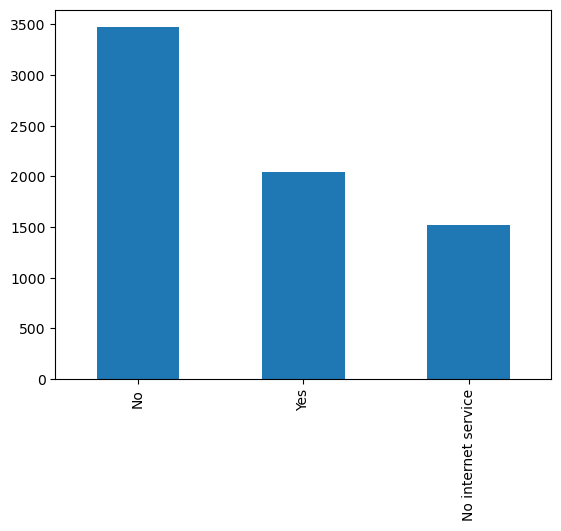

In [129]:
churn['TechSupport'].value_counts().plot.bar()

In [130]:
# Count Plot

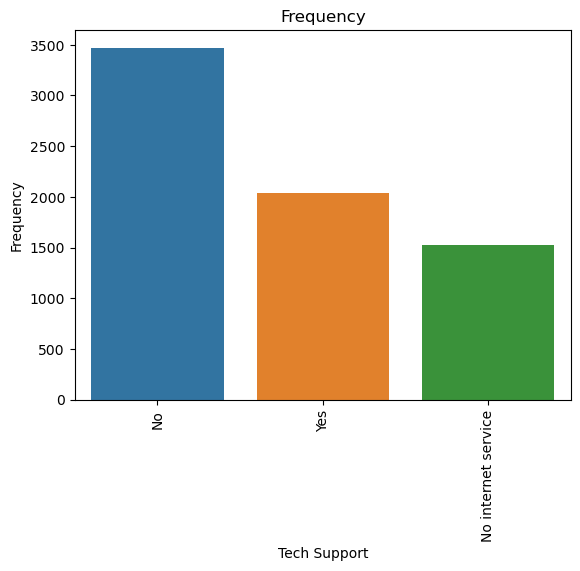

In [131]:
sns.countplot(x='TechSupport' , data = churn)
plt.xlabel("Tech Support")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [132]:
# Streaming TV

<Axes: >

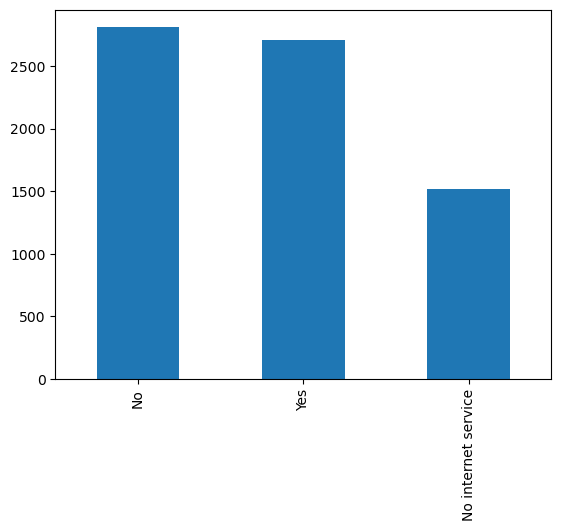

In [133]:
churn['StreamingTV'].value_counts().plot.bar()

In [134]:
# Count Plot

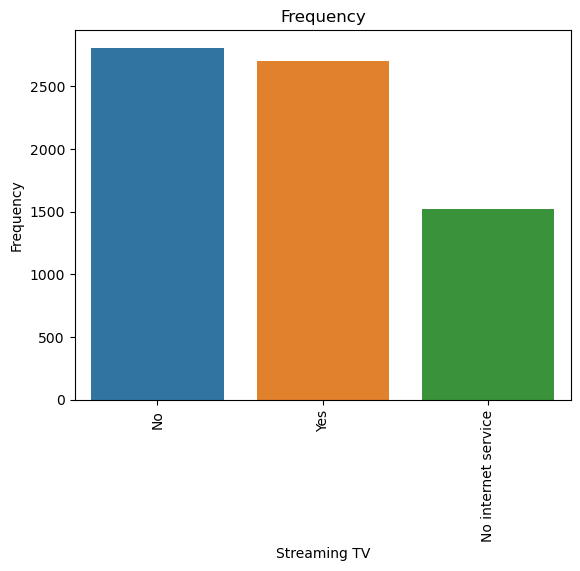

In [135]:
sns.countplot(x='StreamingTV' , data = churn)
plt.xlabel("Streaming TV")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [136]:
# Streaming Movies

<Axes: >

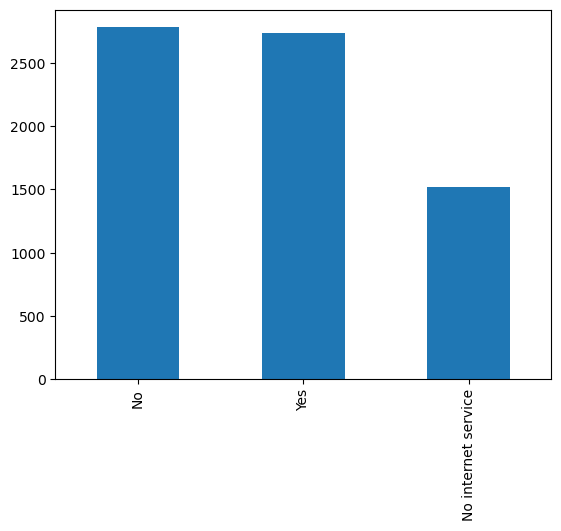

In [137]:
churn['StreamingMovies'].value_counts().plot.bar()

In [138]:
# Count Plot

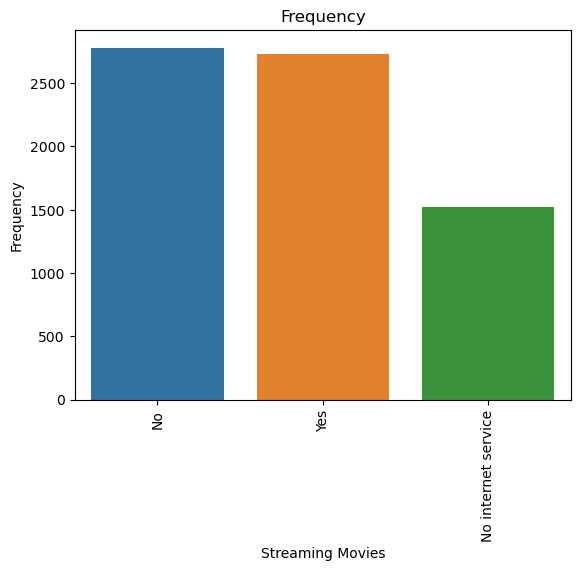

In [139]:
sns.countplot(x='StreamingMovies' , data = churn)
plt.xlabel("Streaming Movies")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [140]:
# Contract

<Axes: >

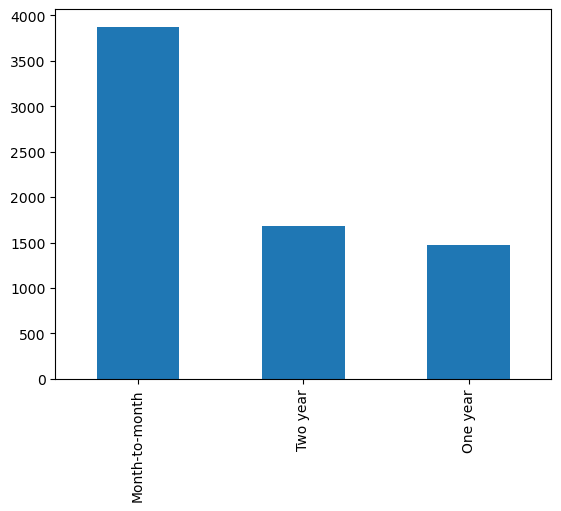

In [141]:
churn['Contract'].value_counts().plot.bar()

In [142]:
# Count Plot

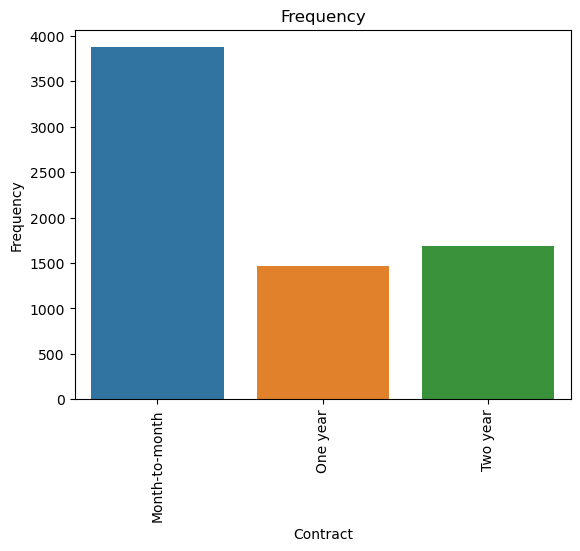

In [143]:
sns.countplot(x='Contract' , data = churn)
plt.xlabel("Contract")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [144]:
# Paperless Billing

<Axes: >

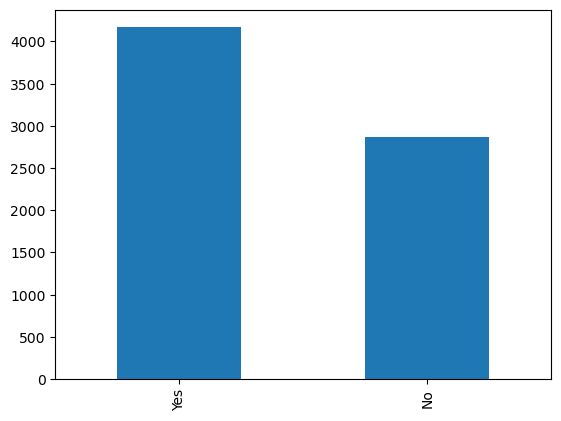

In [145]:
churn['PaperlessBilling'].value_counts().plot.bar()

In [146]:
# Count Plot

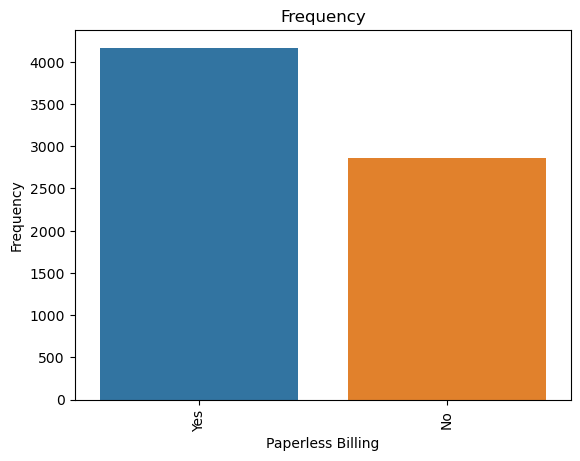

In [147]:
sns.countplot(x='PaperlessBilling' , data = churn)
plt.xlabel("Paperless Billing")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [148]:
# Payment Method

<Axes: >

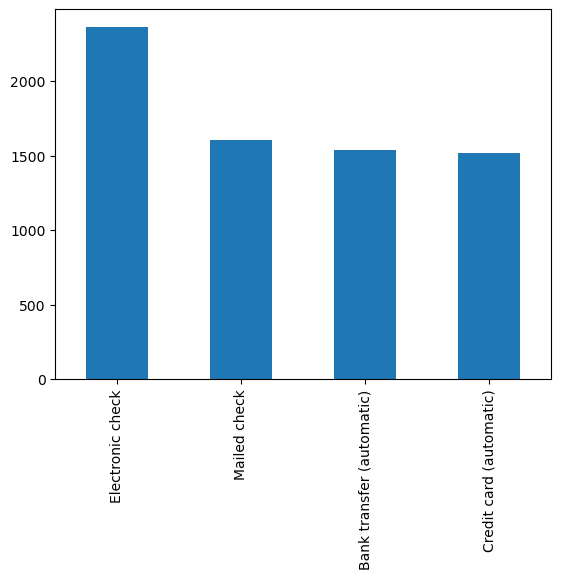

In [149]:
churn['PaymentMethod'].value_counts().plot.bar()

In [150]:
# Count Plot

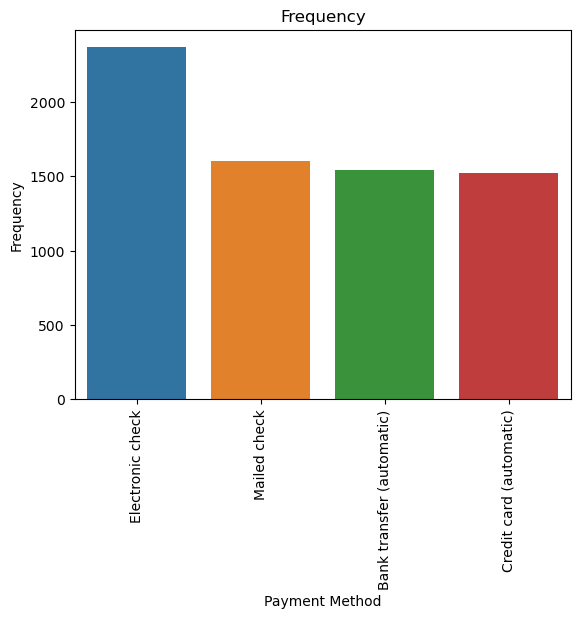

In [151]:
sns.countplot(x='PaymentMethod' , data = churn)
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [152]:
# Pie Chart

In [153]:
# Gender

<Axes: ylabel='gender'>

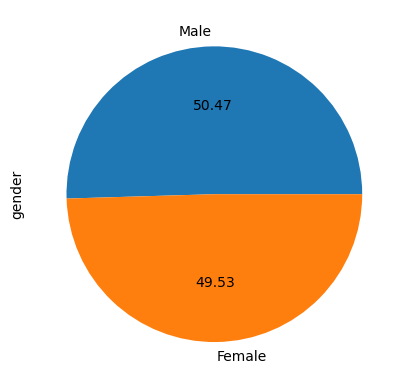

In [154]:
churn['gender'].value_counts().plot.pie(autopct = "%.2f")

In [155]:
y = y.map({"Yes":1,"No":0})

In [156]:
data_numeric = [1 if response == "Yes" else 0 for response in churn]

In [157]:
# Senior Citizen

<Axes: ylabel='SeniorCitizen'>

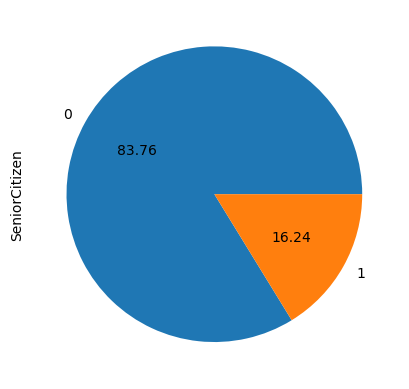

In [158]:
churn['SeniorCitizen'].value_counts().plot.pie(autopct = "%.2f")

In [159]:
# Partner

<Axes: ylabel='Partner'>

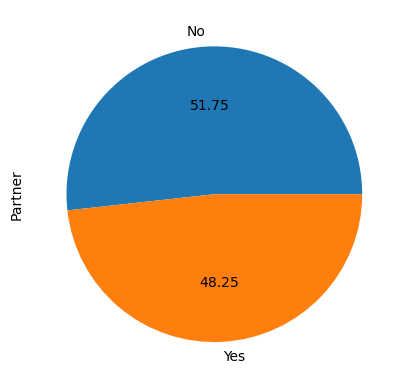

In [160]:
churn['Partner'].value_counts().plot.pie(autopct = "%.2f")

In [161]:
# Dependents

<Axes: ylabel='Dependents'>

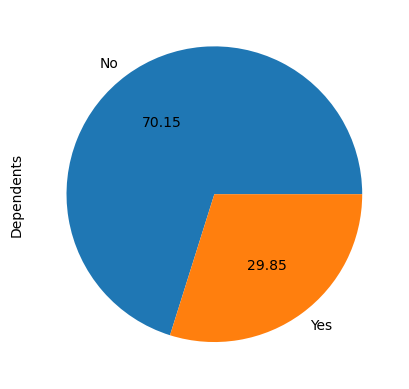

In [162]:
churn['Dependents'].value_counts().plot.pie(autopct = "%.2f")

In [163]:
# Phone Service

<Axes: ylabel='PhoneService'>

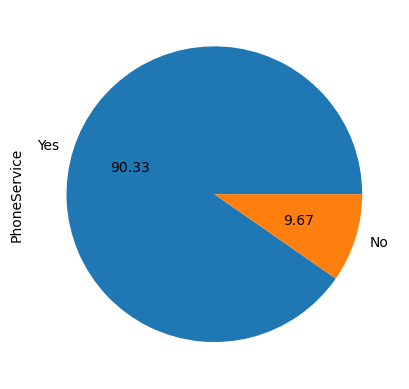

In [164]:
churn['PhoneService'].value_counts().plot.pie(autopct = "%.2f")

In [165]:
# Multiple Lines

<Axes: ylabel='MultipleLines'>

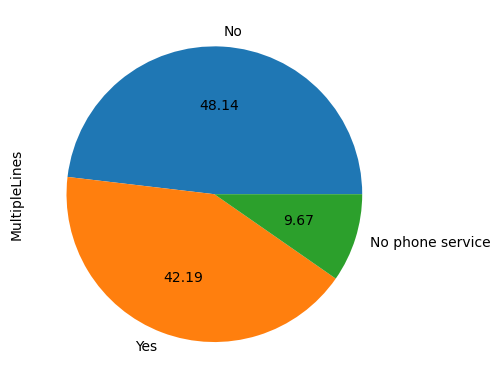

In [166]:
churn['MultipleLines'].value_counts().plot.pie(autopct = "%.2f")

In [167]:
# Internet Service

<Axes: ylabel='InternetService'>

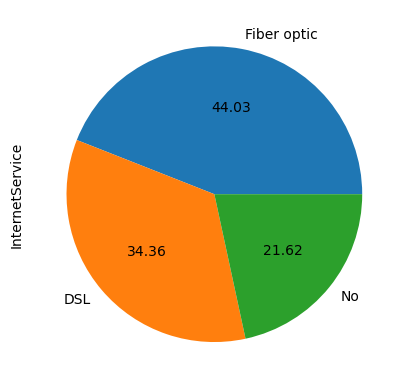

In [168]:
churn['InternetService'].value_counts().plot.pie(autopct = "%.2f")

In [169]:
# Online Security

<Axes: ylabel='OnlineSecurity'>

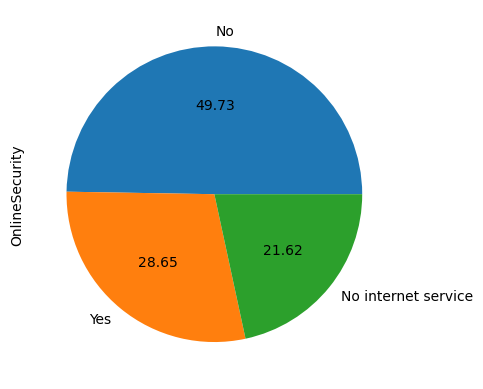

In [170]:
churn['OnlineSecurity'].value_counts().plot.pie(autopct = "%.2f")

In [171]:
# Online Backup

<Axes: ylabel='OnlineBackup'>

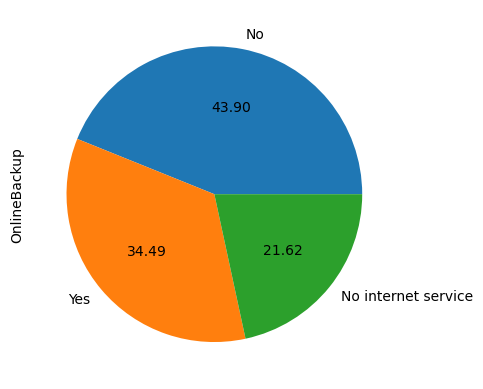

In [172]:
churn['OnlineBackup'].value_counts().plot.pie(autopct = "%.2f")

In [173]:
# Device Protection

<Axes: ylabel='DeviceProtection'>

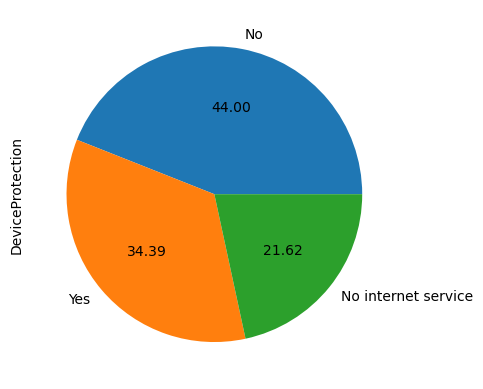

In [174]:
churn['DeviceProtection'].value_counts().plot.pie(autopct = "%.2f")

In [175]:
# Tech Support 

<Axes: ylabel='TechSupport'>

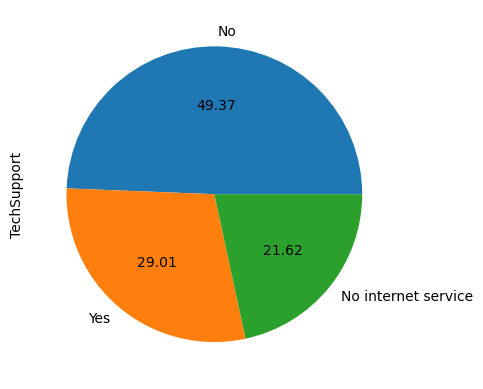

In [176]:
churn['TechSupport'].value_counts().plot.pie(autopct = "%.2f")

In [177]:
# Streaming TV

<Axes: ylabel='StreamingTV'>

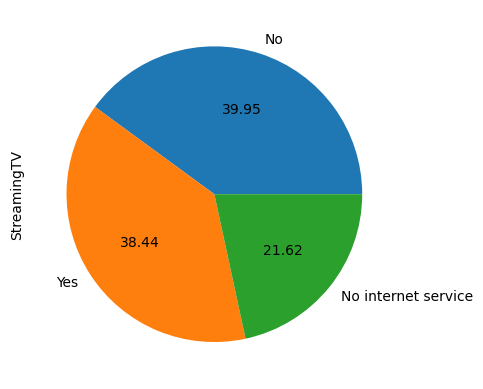

In [178]:
churn['StreamingTV'].value_counts().plot.pie(autopct = "%.2f")

In [179]:
# Streaming Movies

<Axes: ylabel='StreamingMovies'>

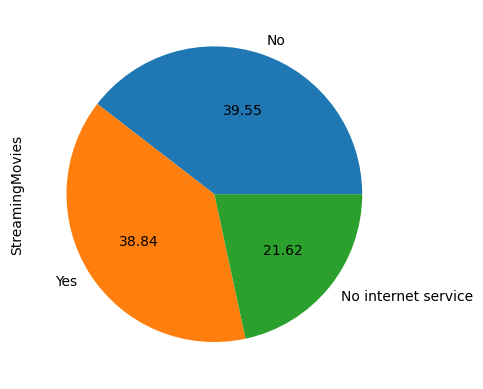

In [180]:
churn['StreamingMovies'].value_counts().plot.pie(autopct = "%.2f")

In [181]:
# Contract

<Axes: ylabel='Contract'>

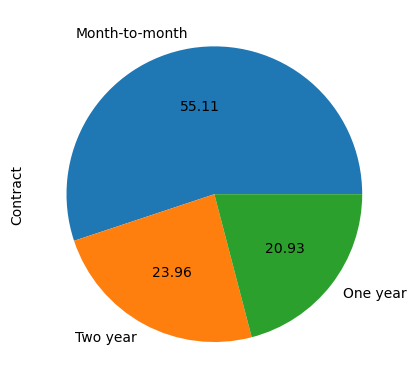

In [182]:
churn['Contract'].value_counts().plot.pie(autopct = "%.2f")

In [183]:
# Paper Less Billing

<Axes: ylabel='PaperlessBilling'>

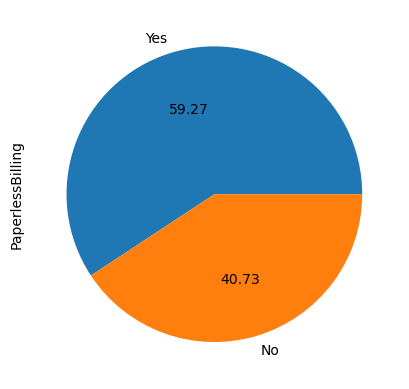

In [184]:
churn['PaperlessBilling'].value_counts().plot.pie(autopct = "%.2f")

In [185]:
# Payment Method

<Axes: ylabel='PaymentMethod'>

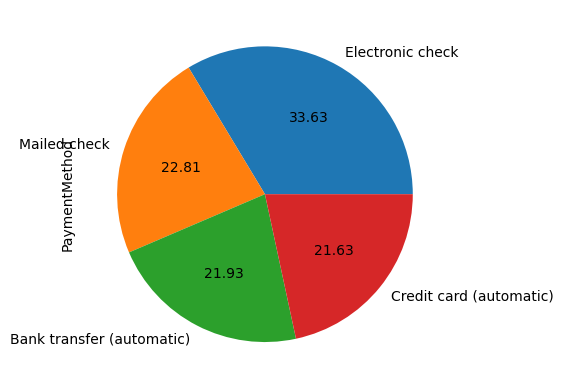

In [186]:
churn['PaymentMethod'].value_counts().plot.pie(autopct = "%.2f")

In [187]:
# Churn

<Axes: ylabel='Churn'>

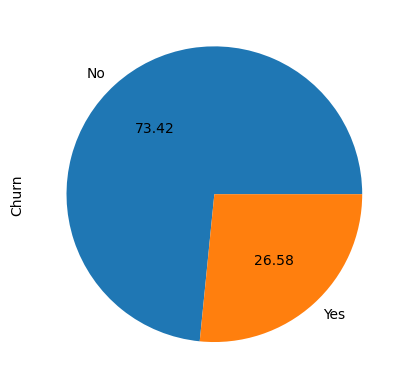

In [188]:
churn['Churn'].value_counts().plot.pie(autopct = "%.2f")

#### For Numerical Data

In [189]:
# Line Chart

In [190]:
# Senior Citizen

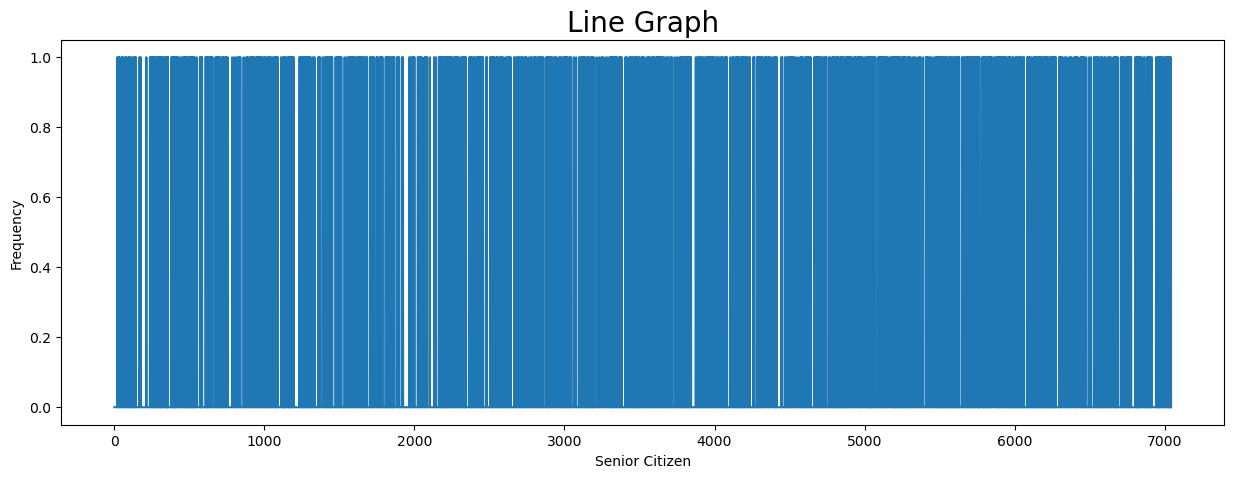

In [191]:
plt.figure(figsize = (15,5))
churn['SeniorCitizen'].plot() #by default plot function gives the line chart 
plt.xlabel("Senior Citizen")
plt.ylabel("Frequency")
plt.title('Line Graph' , fontsize = 20)
plt.show()

In [192]:
# Tenure

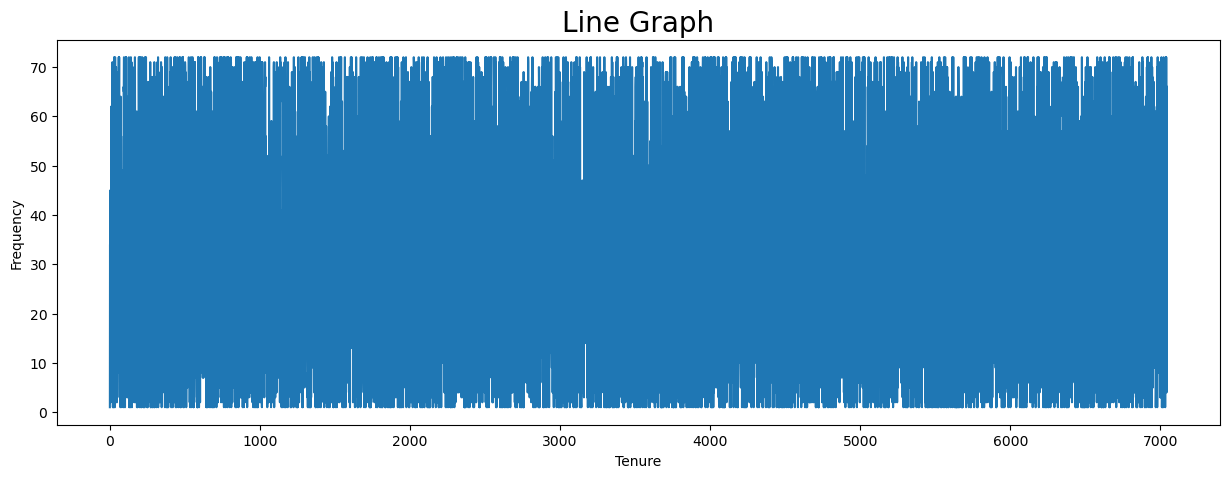

In [193]:
plt.figure(figsize = (15,5))
churn['tenure'].plot() #by default plot function gives the line chart 
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title('Line Graph' , fontsize = 20)
plt.show()

In [194]:
# Monthly Charges

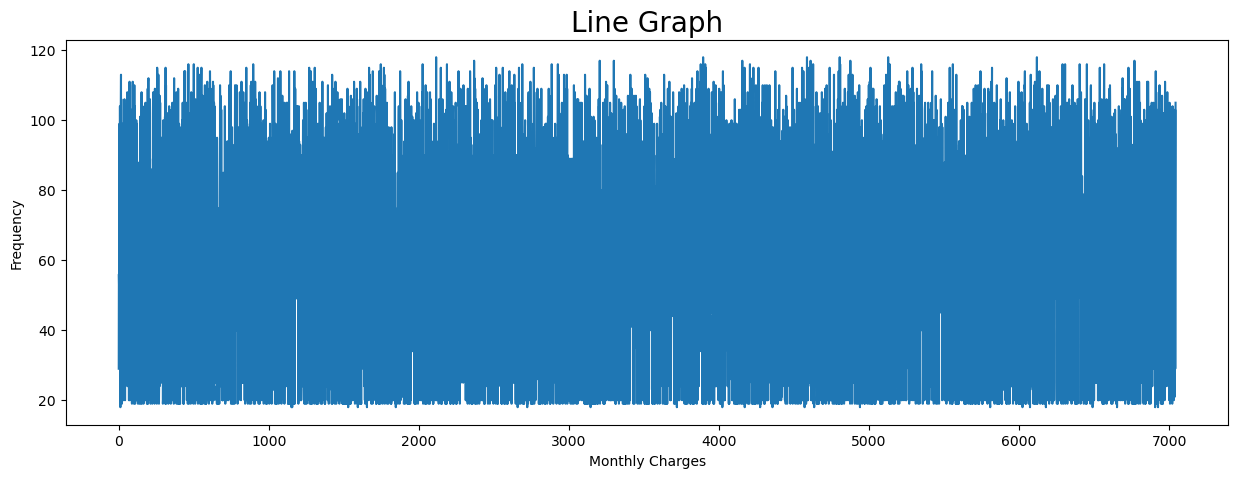

In [195]:
plt.figure(figsize = (15,5))
churn['MonthlyCharges'].plot() #by default plot function gives the line chart 
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title('Line Graph' , fontsize = 20)
plt.show()

In [196]:
# Total Charges

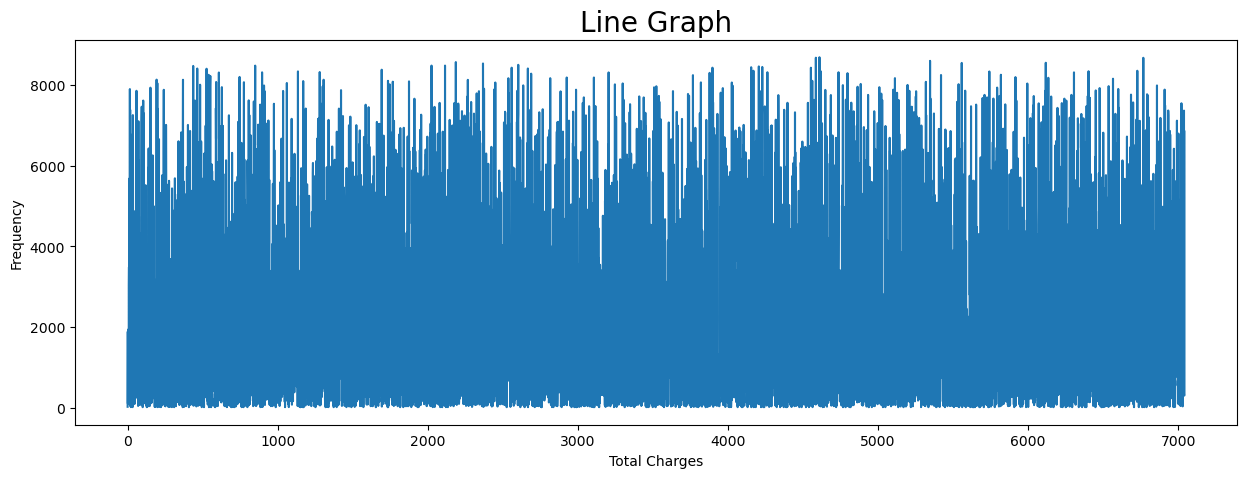

In [197]:
plt.figure(figsize = (15,5))
churn['TotalCharges'].plot() #by default plot function gives the line chart 
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.title('Line Graph' , fontsize = 20)
plt.show()

In [198]:
# Histogram

In [199]:
# Senior Citizen

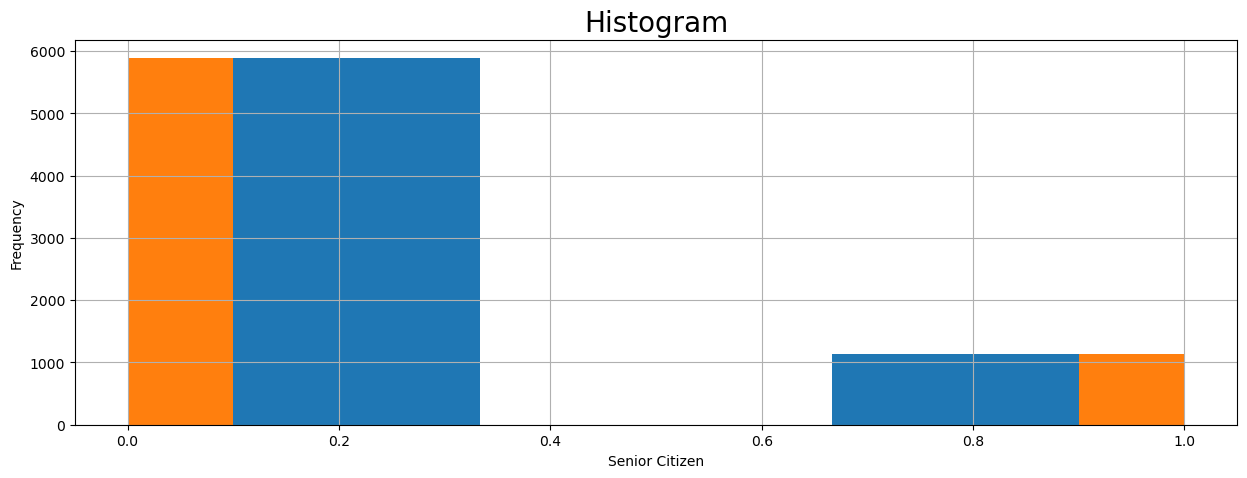

In [200]:
plt.figure(figsize = (15,5))
plt.hist(churn['SeniorCitizen'] , bins = 3 , orientation = 'vertical') # By default the orientation is set to vertical # 
churn['SeniorCitizen'].hist() #by default plot function gives the line chart 
plt.xlabel("Senior Citizen")
plt.ylabel("Frequency")
plt.title('Histogram' , fontsize = 20)
plt.show()

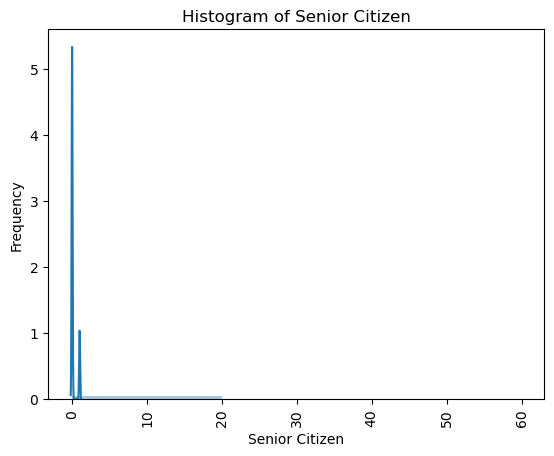

In [201]:
sns.distplot(churn["SeniorCitizen"] , kde = True , bins = [0,20,40,60])
plt.title('Histogram of Senior Citizen')
plt.xlabel("Senior Citizen")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [202]:
# Tenure

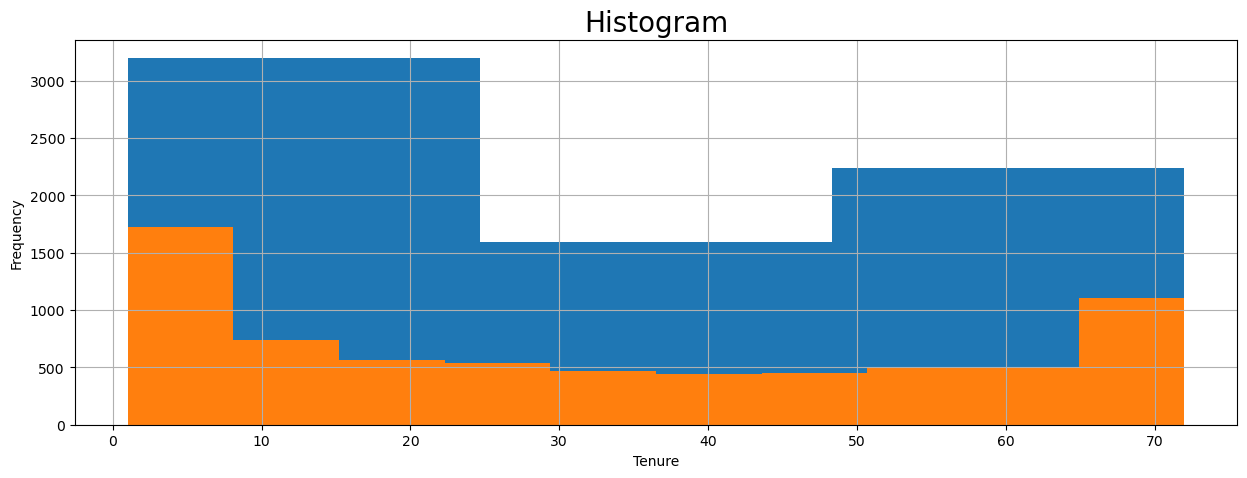

In [203]:
plt.figure(figsize = (15,5))
plt.hist(churn['tenure'] , bins = 3 , orientation = 'vertical') # By default the orientation is set to vertical # 
churn['tenure'].hist() #by default plot function gives the line chart 
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title('Histogram' , fontsize = 20)
plt.show()

In [204]:
# Monthly Charges

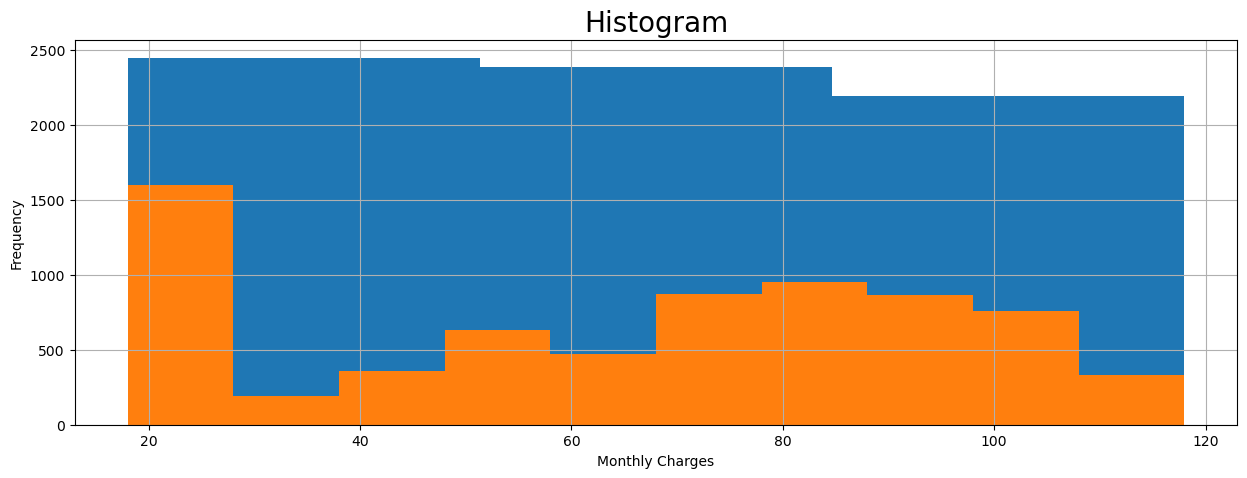

In [205]:
plt.figure(figsize = (15,5))
plt.hist(churn['MonthlyCharges'] , bins = 3 , orientation = 'vertical') # By default the orientation is set to vertical # 
churn['MonthlyCharges'].hist() #by default plot function gives the line chart 
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title('Histogram' , fontsize = 20)
plt.show()

In [206]:
# Total Charges

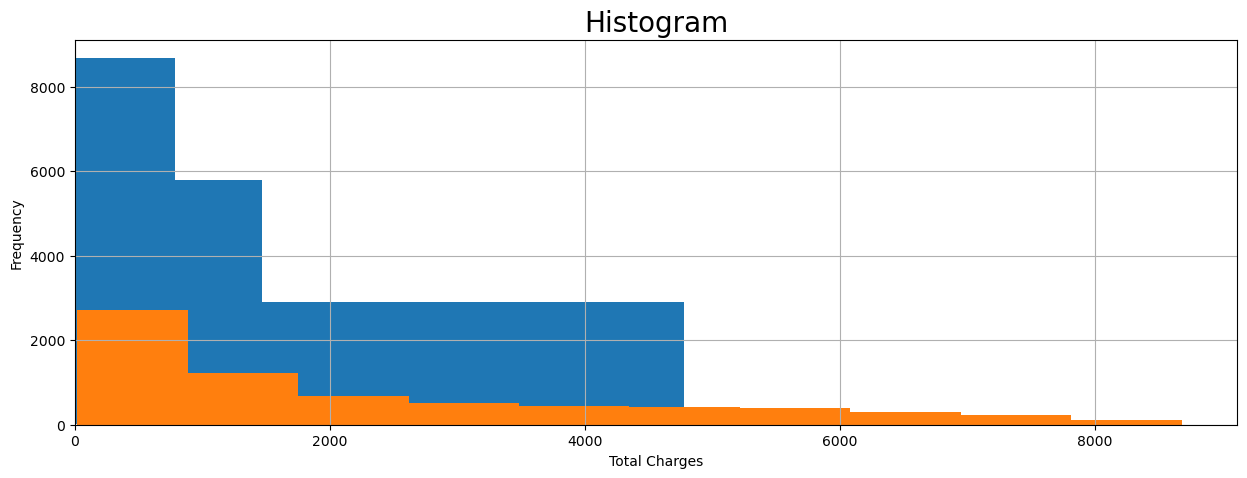

In [207]:
plt.figure(figsize = (15,5))
plt.hist(churn['TotalCharges'] , bins = 3 , orientation = 'horizontal') # By default the orientation is set to vertical # 
churn['TotalCharges'].hist() #by default plot function gives the line chart 
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.title('Histogram' , fontsize = 20)
plt.show()

### Bi - Variate Analysis

#### For Categorical Data

In [208]:
# Partner vs Dependents

In [209]:
# Cross Tab

In [210]:
pd.crosstab(churn.Partner,churn.Dependents)

Dependents,No,Yes
Partner,,
No,3280,359
Yes,1653,1740


In [211]:
# Charges

In [212]:
# Scatter Plot

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

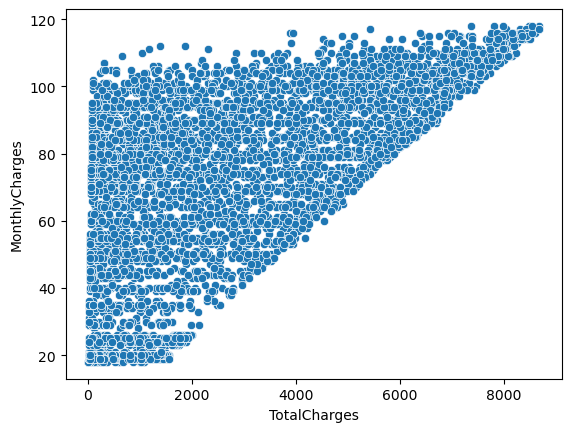

In [213]:
sns.scatterplot(x = churn["TotalCharges"] , y = churn["MonthlyCharges"])

In [214]:
# Box Plot

In [215]:
# Churn with respect to Monthly_Charges

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

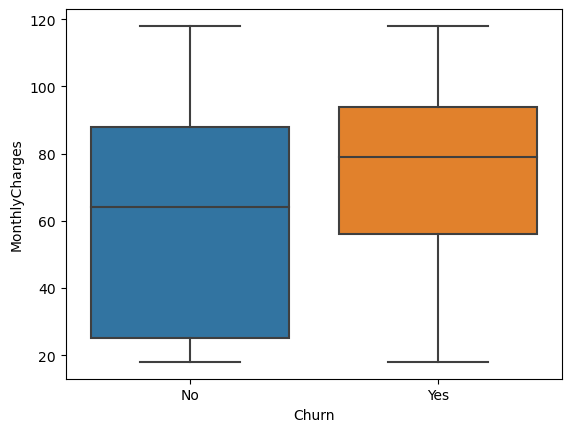

In [216]:
sns.boxplot(churn,x="Churn",y="MonthlyCharges")

In [217]:
# Churn with respect to Total_Charges

<Axes: xlabel='Churn', ylabel='TotalCharges'>

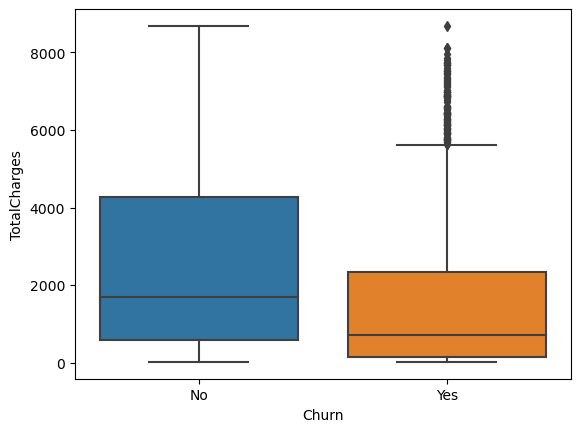

In [218]:
sns.boxplot(churn,x="Churn",y="TotalCharges")

In [219]:
# Churn with respect to Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

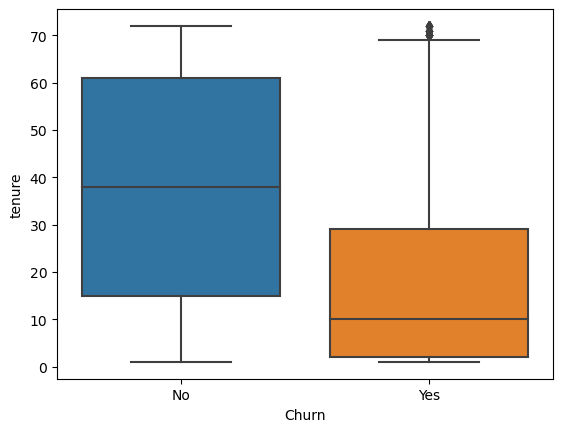

In [220]:
sns.boxplot(churn,x="Churn",y="tenure")

In [221]:
# Dist Plot

In [222]:
# Partner and Dependents

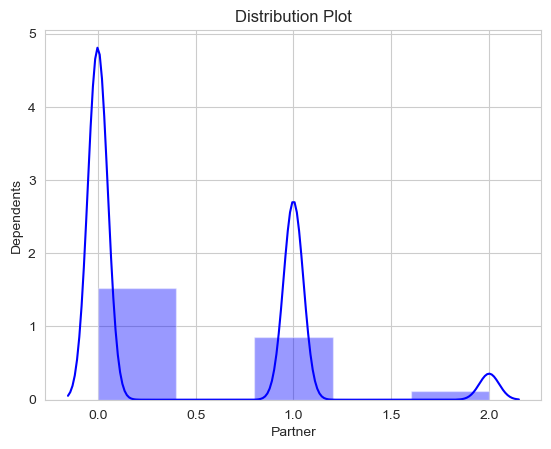

In [223]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("Partner")
plt.ylabel("Dependents")
plt.title("Distribution Plot")
plt.show()

In [224]:
# Monthly Charges vs Total Charges

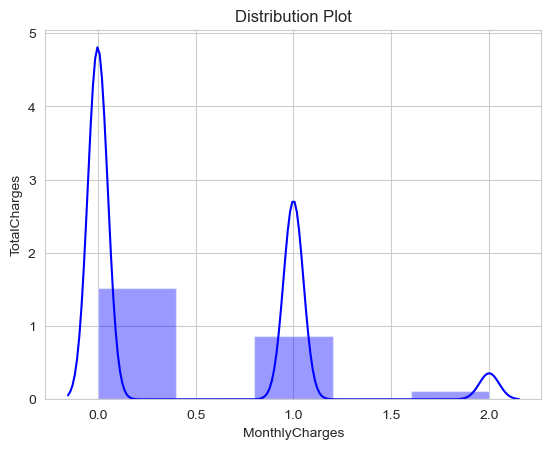

In [225]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.title("Distribution Plot")
plt.show()

In [226]:
# Phone Service vs Contract

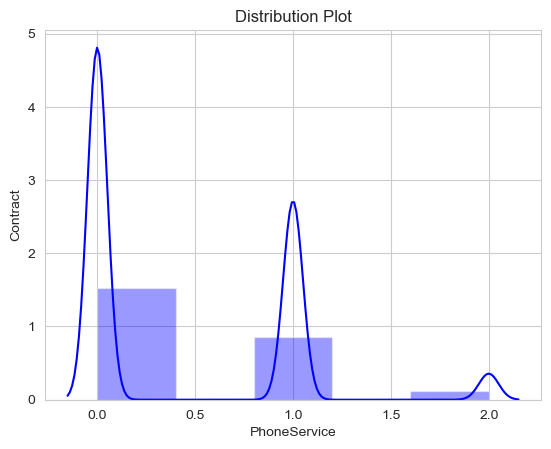

In [227]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("PhoneService")
plt.ylabel("Contract")
plt.title("Distribution Plot")
plt.show()

In [228]:
# Payment Method vs Paperless Billing

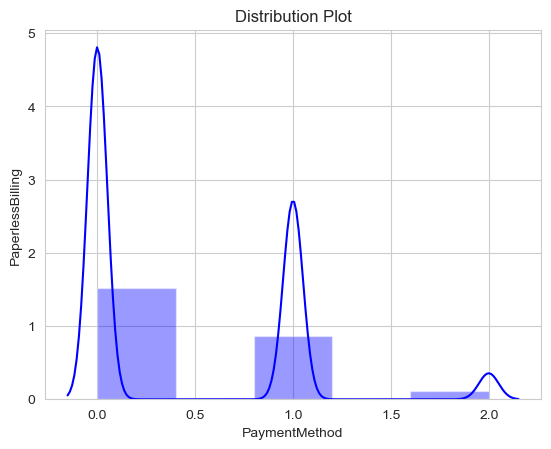

In [229]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("PaymentMethod")
plt.ylabel("PaperlessBilling")
plt.title("Distribution Plot")
plt.show()

In [230]:
# Payment Method vs Paperless Billing

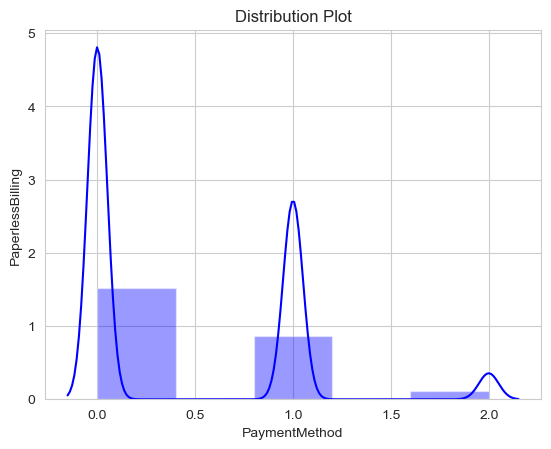

In [231]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("PaymentMethod")
plt.ylabel("PaperlessBilling")
plt.title("Distribution Plot")
plt.show()

In [232]:
# Device Protection vs Tech Support

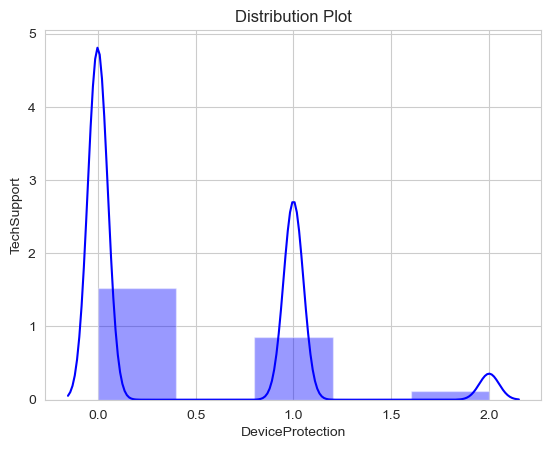

In [233]:
sns.set_style("whitegrid")
sns.distplot(churn_cat_df, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("DeviceProtection")
plt.ylabel("TechSupport")
plt.title("Distribution Plot")
plt.show()

In [234]:
# 

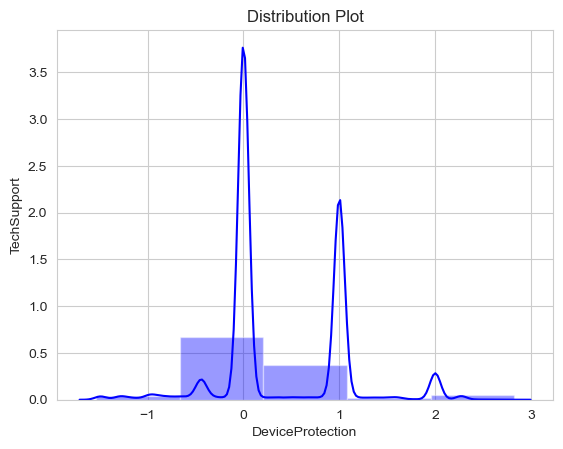

In [235]:
sns.set_style("whitegrid")
sns.distplot(Churn, kde=True, color="blue", bins=5)  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("DeviceProtection")
plt.ylabel("TechSupport")
plt.title("Distribution Plot")
plt.show()

## Multi - Variate Analysis

In [236]:
# Numerical Data vs categorical Data

In [237]:
# Bar Plot

In [238]:
# Tech Support vs Total Charges

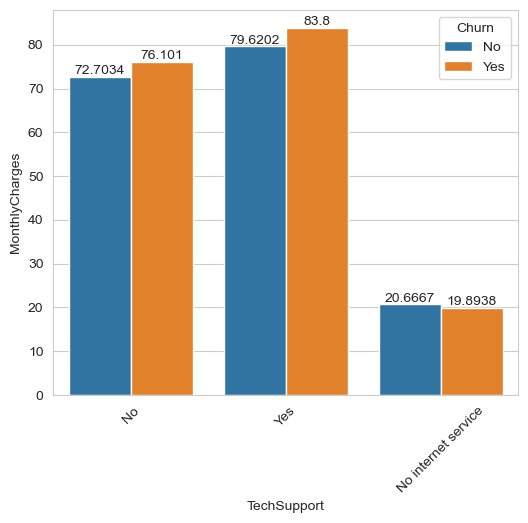

In [239]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['TechSupport'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [240]:
# Internet Service vs Monthly Charges

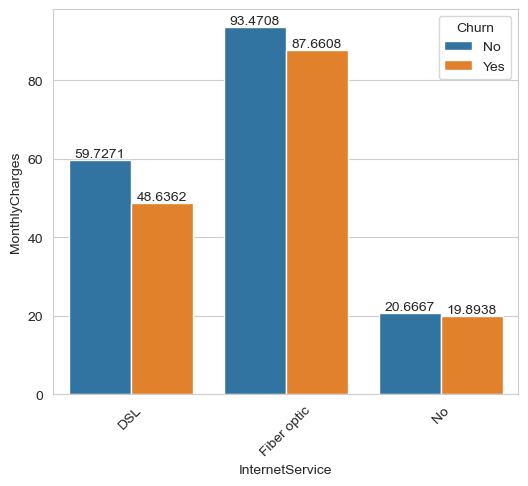

In [241]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['InternetService'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [242]:
# Streaming TV vs Monthly Charges

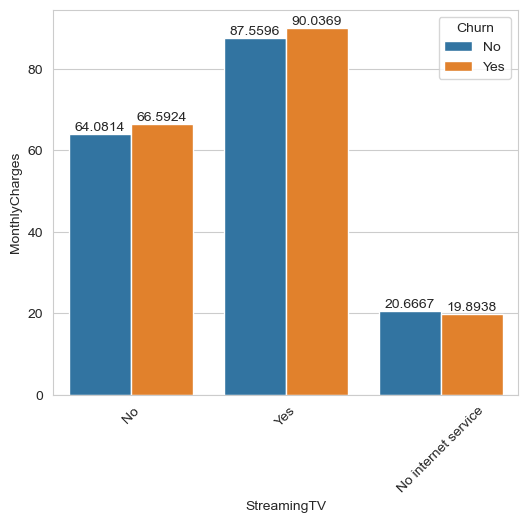

In [243]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['StreamingTV'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [244]:
# Device Protection vs Monthly Charges

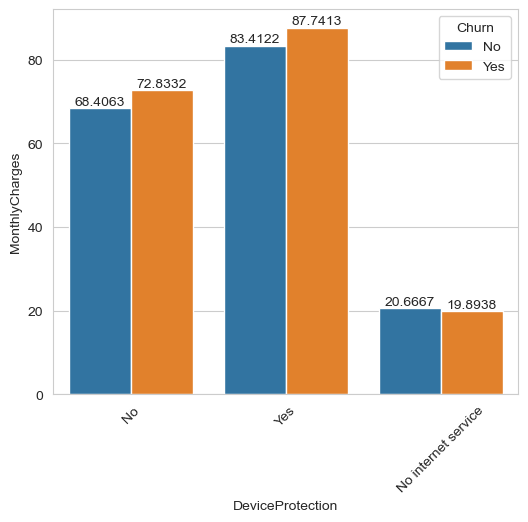

In [245]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['DeviceProtection'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [246]:
# Phone Service vs Monthly Charges

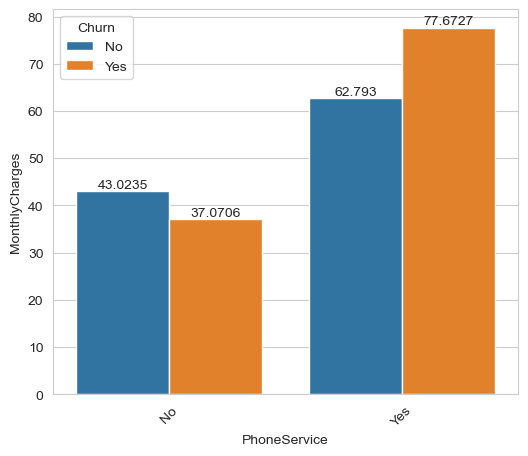

In [247]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['PhoneService'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [248]:
# Multiple Lines vs Monthly Charges

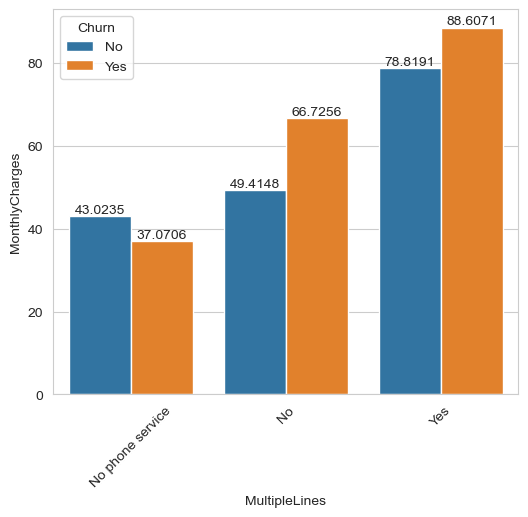

In [249]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['MultipleLines'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [250]:
# Online Security vs Montly Charges

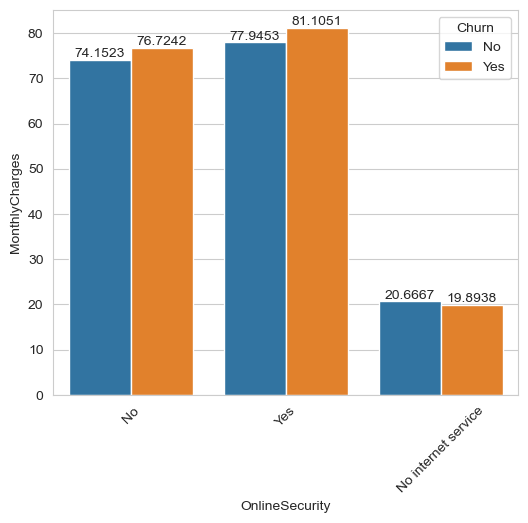

In [251]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['OnlineSecurity'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [252]:
# Streaming Movies vs Monthly Charges

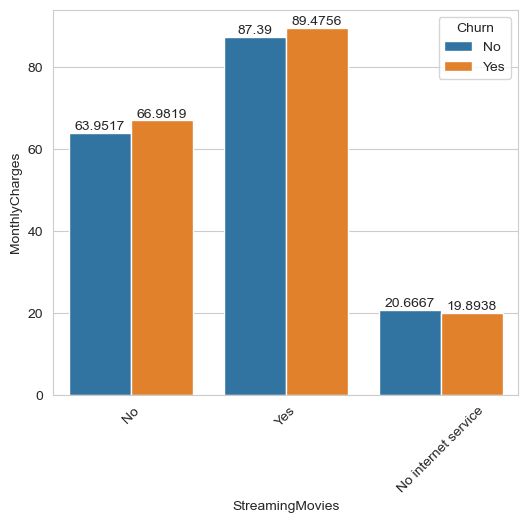

In [253]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['StreamingMovies'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [254]:
# Contract vs Monthly Charges

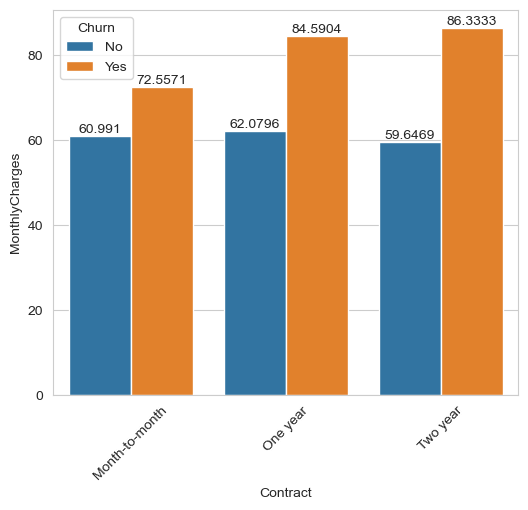

In [255]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['Contract'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [256]:
# Paperless Billing vs Monthly Charges

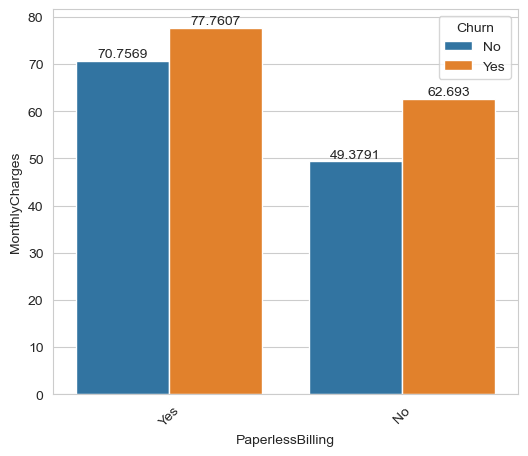

In [257]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['PaperlessBilling'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [258]:
# Payment Method vs Monthly Charges

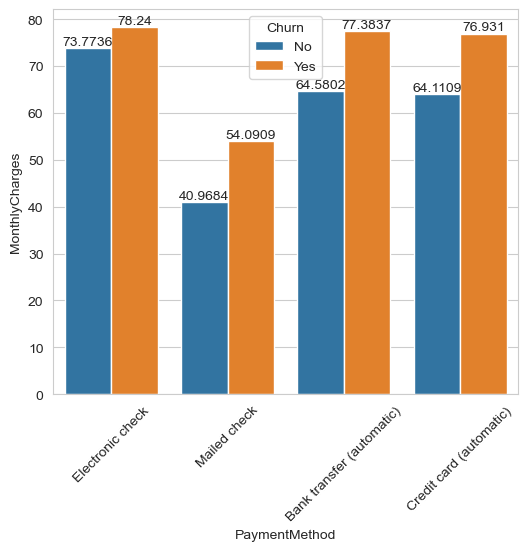

In [259]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=churn['PaymentMethod'],y=churn['MonthlyCharges'],hue = churn['Churn'], data = churn, ci = None,orient = "v")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [260]:
# Numerical Data

In [261]:
# Scatter Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


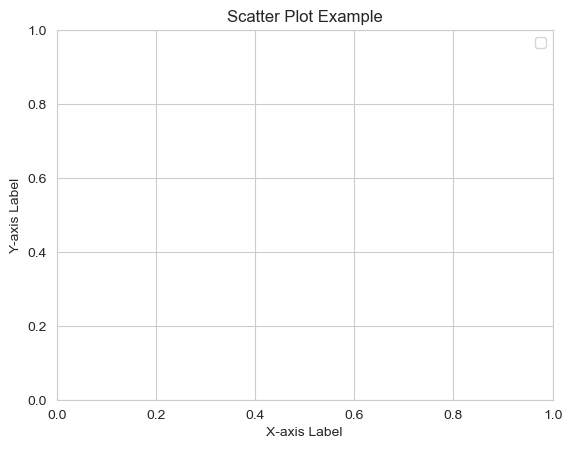

In [262]:
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Add a legend (if needed)
plt.legend()

# Show the plot
plt.show()

In [263]:
# Box Plot

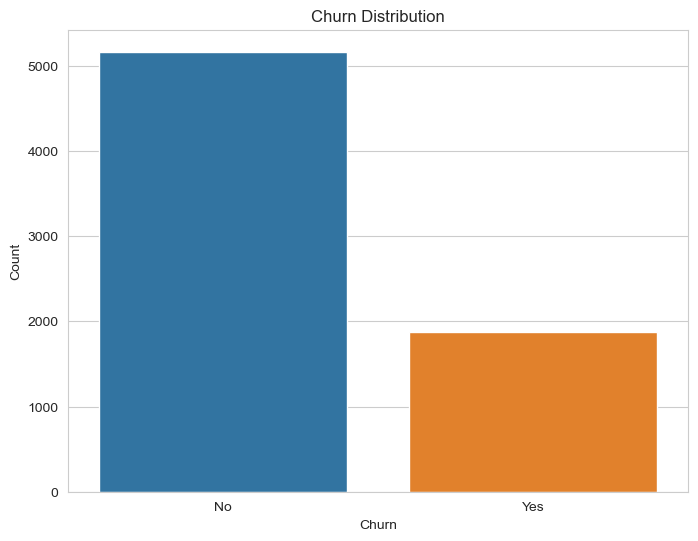

In [264]:
plt.figure(figsize=(8, 6))
sns.countplot(data=churn, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [265]:
# Pie Chart

ValueError: x must be 1D

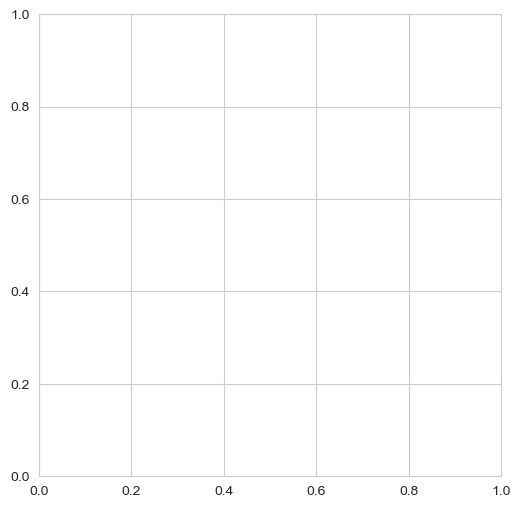

In [266]:
# Create a pie chart
labels = churn_cat_df.index
sizes = churn_cat_df.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Churned)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#sns.boxplot( x = churn["MonthlyCharges"] , y = churn["TotalCharges"] , hue = churn["Churn"] , legend = None)

In [ ]:
churn

In [ ]:
churn.columns

In [ ]:
churn_num_df.columns

In [ ]:
END

In [ ]:
for i, predictor in enumerate(churn.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn, x=predictor, hue='Churn')